**Demand Forecasting using ARIMA**  

Demand Forecasting Using Time Series Analysis to Optimize Inventory 

Performance Assessment 2 

D214 – Data Analytics Graduate Capstone 

Jessica Hosey  

MSDA, College of Information Technology  

Western Governors University  

February 12th, 2025  

**A. Research Question** 

Research Question: "To what extent can product demand be predicted using time series analysis of historical sales data?"  

E-commerce has exploded ever since the 2019 COVID-19 pandemic, where small businesses have been able to reach customers without a physical brick-and-mortar store. Along with the help of social media, companies have been able to generate traffic to their websites and have increased their earnings ever since. According to the International Trade Administration, there has been approximately a 20% increase in sales in the following 2 years after 2019. This has affected traditional businesses; however, more people are purchasing goods online as it is more convenient and does not require shoes or standing in line at the checkout. People are more willing to wait for products via shipping than ever before. As someone who hates dealing with slow walkers, I prefer shopping online to a traditional store. Ultimately, e-commerce is here to stay and will continue to grow, and we need to build effective machine learning prediction models to help these companies plan for the flow of product demand.  

This research project will use a dataset with transactional data from December 2010 to December 2011 to practice building such a model. This dataset is based on a United Kingdom e-commerce business and contains various products to predict future demand using ARIMA time-series modeling. As stated in my previous submission, "predictions on inventory would help drive the business decisions about inventory management, marketing campaigns, and procurement (Hosey 2025)."  

The hypotheses for this project are as follows:  

- Null Hypothesis - Product demand cannot be predicted with 90% accuracy (Hosey 2025).  

- Alternate Hypothesis - Product demand can be predicted with 90% accuracy (Hosey 2025).  

These hypotheses will allow us to set a standard for the resulting prediction models to measure their performance effectively. If the model's results provide a Mean Absolute Percentage Error greater than 10%, this will indicate that we will accept the null hypothesis and reject the alternative hypothesis. If the results provide a Mean Absolute Percentage Error of less than 10%, we reject the null hypothesis and accept the alternative hypothesis.

**B. Data Collection** 

The primary data source for this project is historical transactional data that was not collected but downloaded from the UCI Machine Learning Repository. This dataset for a UK-based e-commerce business contains the following columns: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country. This dataset is housed on the UCI website, where several datasets are available to the public and are licensed by Creative Commons Attribution 4.0 International. This license allows UCI to share the dataset as long as the user credits the dataset owner.  

This dataset contains 282,959 transactions that occurred between December 2010 to December 2011. An advantage of this collection method is that we do not need to contact the store owner to use the dataset as it is under that license, and it is large enough to complete the analysis with over 200k transactions. A disadvantage to data collection methods is that we do not know the history of this business, what it specializes in, or the name of it. This information could give us insight into the company's mission, goals, and values. Additionally, the dataset only contains one year of sales, and ideally, we would instead use multiple years of sales to predict product demand. Therefore, there is a chance that this project will fail, and the product demand will not be successfully predicted. Since there are over 200k transactions, we will continue to complete the analysis regardless, as this challenge will not hinder our ability to forecast product demand.  

**C. Data Extraction and Preparation** 

This report is being submitted as a Jupyter notebook, which means all my code is found below and is annotated to give context to what is happening at each step of the data extraction and preparation process. The comments before my code allow the reader to see what is happening to the data and which steps are necessary to clean, transform, and extract information from the original dataset in preparation for ARIMA time series analysis.  

Here are all the tools and techniques used for my data extraction and preparation process:  

- Python programming language – using the Anaconda Cloud environment  
- Jupyter Notebook – Also housed in the Anaconda Cloud environment  
- Python Libraries:  
    - Pandas  
    - NumPy  
    - MatPlotLib – pyplot  
    - Seaborn  
    - Sklearn – train_test_split, mean_squared_error  
    - Statsmodels – adfuller, seasonal_decompose, plot_acf, plot_pacf, ARIMA  
    - Scipy – signal  

Python programming language has several benefits and some disadvantages. One benefit is learning and understanding the basic commands for basic computing tasks is easy. It is easy because Python can download/import several different libraries to help users complete their projects. Between learning Python and R, I felt more comfortable coding in Python. I felt confused when learning R. Python was an easy choice to continue learning, and I do not think I will ever try R again. One main disadvantage of Python is that it can be slower than other languages (like R) when computing execution (Joy 2025).  

Anaconda Cloud is a robust environment manager that we can use to save many different projects. It automatically saves your progress, making installing and uninstalling Python packages easy. One disadvantage noticed while using TensorFlow is that it occasionally gets stuck on some applications when downloading and installing/uninstalling some packages. However, this project had no issues with the Anaconda Cloud environment.  

Jupyter Notebook is an easy-to-use tool for projects using code. It has several benefits, such as allowing users to see all inputs and outputs on the same screen, duplicate cells (to compare outputs on two ways of transforming data), and moving cells up and down the coding field. These are some of the benefits, and there are more! One disadvantage of Jupyter Notebook is it can be slow in running code. This dataset had 200k rows of data; while executing some steps in my code, I noticed it took the Jupyter Notebook a bit longer to load the dataset and compute more complex tasks, such as forecasting many models.  

Pandas is a Python library that allows users to load a dataset into a data frame and complete complex operations on that table. This makes manipulating and viewing the contents of the table very easy. Occasionally, syntax is frustrating when completing more complex tasks as it requires the data to be a data frame, not a series. This was one issue we had while completing this project, and it was easily solved.  

NumPy is not a library we use directly; however, MatPlotLib (another Python library) uses NumPy to perform many mathematical calculations on the dataset and create visualizations. This project used NumPy to calculate the mean and create graph trend lines. One major disadvantage of using NumPy is that it establishes null values when using pmdarima to generate auto_arima (the time series tool used to forecast product demand in this project). Due to the creation of null values, this ends up affecting the auto_arima function from working.  

MatPlotLib was used to generate all the graphs in this project within the Jupyter Notebook. MatPlotLib makes it easy to create simple to complex graphs that are easy to read. The disadvantage to MatPlotLib is that it can be hard to know how to format specific titles and labels of diagrams. For example, on my decomposition graphs, the axis titles are all jumbled, and you cannot see the actual axis numbers as it does not automatically shift the dates to a horizontal format for easy reading. Also, MatPlotLib does not automatically format graphs (computed in the same cell) into a side-by-side format. Each graph is significant, and one is placed on top of another. Therefore, half of my report requires you to scroll through all the graphs to reach the product demand projections. Another irritating feature of MatPlotLib is that you must tell the computer to show the graph, or it will not appear as an output. Why would you write out all the code for a graph but not want to see it? When scripting for a visualization when scripting for a visualization that it appears as an output without specifically stating to show it.  

In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pmdarima as pm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from scipy import signal

#Loading Dataset
df = pd.read_csv('./Online Retail.csv')
#Check data types and size of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282959 entries, 0 to 282958
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    282959 non-null  object 
 1   StockCode    282959 non-null  object 
 2   Description  281882 non-null  object 
 3   Quantity     282959 non-null  int64  
 4   InvoiceDate  282959 non-null  object 
 5   UnitPrice    282959 non-null  float64
 6   CustomerID   202118 non-null  float64
 7   Country      282958 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 17.3+ MB


In [7]:
#data cleaning
#remove rows with missing CustomerID or InvoiceDate
data = df.dropna(subset=['CustomerID', 'InvoiceDate'])

#convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#remove rows with negative quantities
data = df[df['Quantity'] > 0]

#data aggregation by product
top10_products = df['StockCode'].value_counts().head(10).index
filtered_data = df[df['StockCode'].isin(top10_products)]

In [8]:
#remove rows with negative quantities (returns or errors - not helpful for product demand forecasting)
filtered_data = filtered_data[filtered_data['Quantity'] > 0]

In [9]:
top10_products

Index(['85123A', '22423', '85099B', '47566', '20725', '21212', '22720',
       '84879', '22457', '22383'],
      dtype='object', name='StockCode')

In [10]:
#ensure InvoiceDate is in datetime format
filtered_data['InvoiceDate'] = pd.to_datetime(filtered_data['InvoiceDate'])

#create a new column for the date part only
filtered_data['Date'] = filtered_data['InvoiceDate'].dt.date

#group data by daily sales per product
product_demand = filtered_data.groupby(['Date', 'StockCode'])['Quantity'].sum().reset_index()
product_demand.columns = ['Date', 'StockCode', 'TotalQuantity']

In [11]:
#StockCode 85123A - single product for forecasting
product_id = top10_products[0] 
product_data_1 = product_demand[product_demand['StockCode'] == product_id].copy()
product_data_1.set_index('Date', inplace=True)

#handle missing dates (fill missing dates with zero sales - assuming they paused sales for a day off)
product_data_1 = product_data_1.asfreq('D').fillna(0)

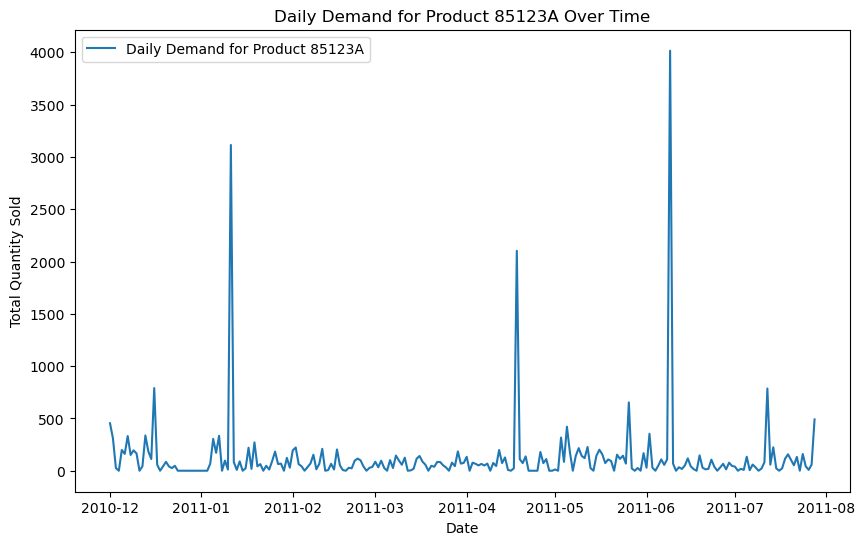

In [12]:
#StockCode 85123A - exploratory data analysis
plt.figure(figsize=(10, 6))
plt.plot(product_data_1.index, product_data_1['TotalQuantity'], label=f'Daily Demand for Product {product_id}')
plt.title(f'Daily Demand for Product {product_id} Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.show()

In [13]:
#StockCode 22423 - single product for forecasting
product_id = top10_products[1] 
product_data_2 = product_demand[product_demand['StockCode'] == product_id].copy()
product_data_2.set_index('Date', inplace=True)

#handle missing dates (fill missing dates with zero sales - assuming they paused sales for a day off)
product_data_2 = product_data_2.asfreq('D').fillna(0)

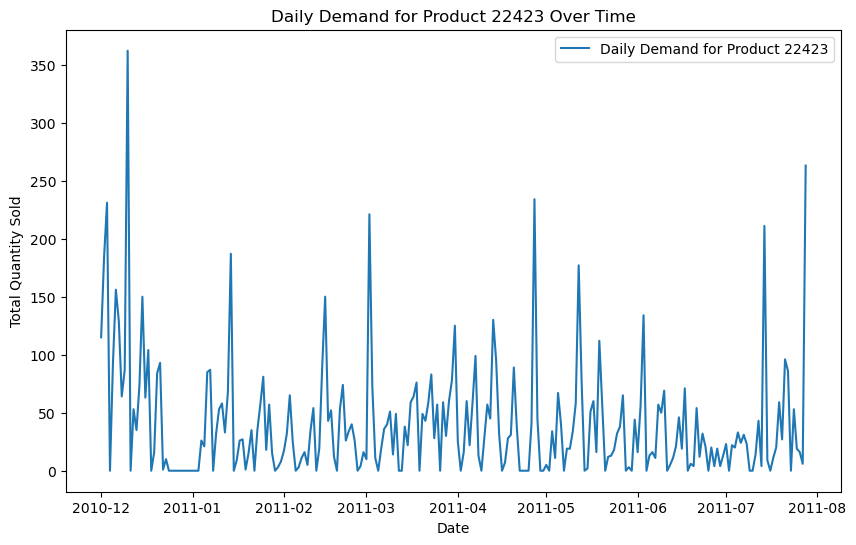

In [14]:
#StockCode 22423 - exploratory data analysis
plt.figure(figsize=(10, 6))
plt.plot(product_data_2.index, product_data_2['TotalQuantity'], label=f'Daily Demand for Product {product_id}')
plt.title(f'Daily Demand for Product {product_id} Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.show()

In [15]:
#StockCode 85099B - single product for forecasting
product_id = top10_products[2] 
product_data_3 = product_demand[product_demand['StockCode'] == product_id].copy()
product_data_3.set_index('Date', inplace=True)

#handle missing dates (fill missing dates with zero sales - assuming they paused sales for a day off)
product_data_3 = product_data_3.asfreq('D').fillna(0)

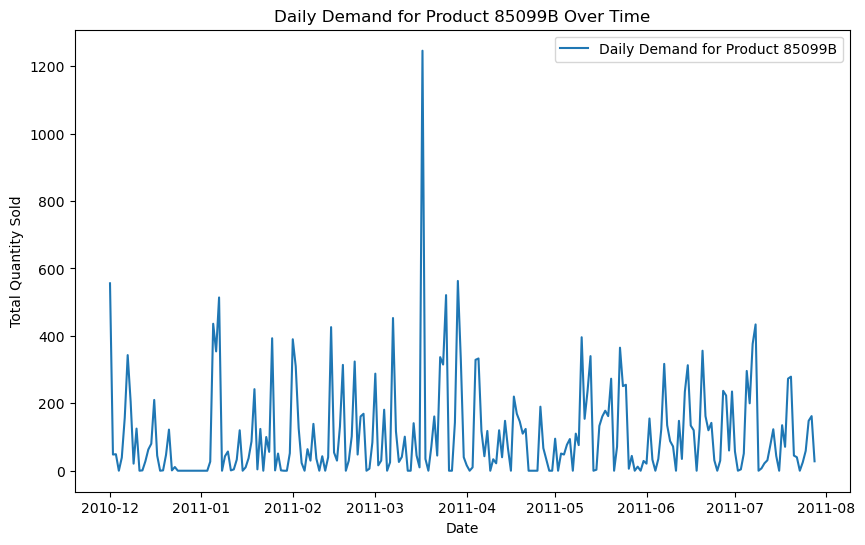

In [16]:
#StockCode 85099B - exploratory data analysis
plt.figure(figsize=(10, 6))
plt.plot(product_data_3.index, product_data_3['TotalQuantity'], label=f'Daily Demand for Product {product_id}')
plt.title(f'Daily Demand for Product {product_id} Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.show()

In [17]:
#StockCode 47566 - single product for forecasting
product_id = top10_products[3] 
product_data_4 = product_demand[product_demand['StockCode'] == product_id].copy()
product_data_4.set_index('Date', inplace=True)

#handle missing dates (fill missing dates with zero sales - assuming they paused sales for a day off)
product_data_4 = product_data_4.asfreq('D').fillna(0)

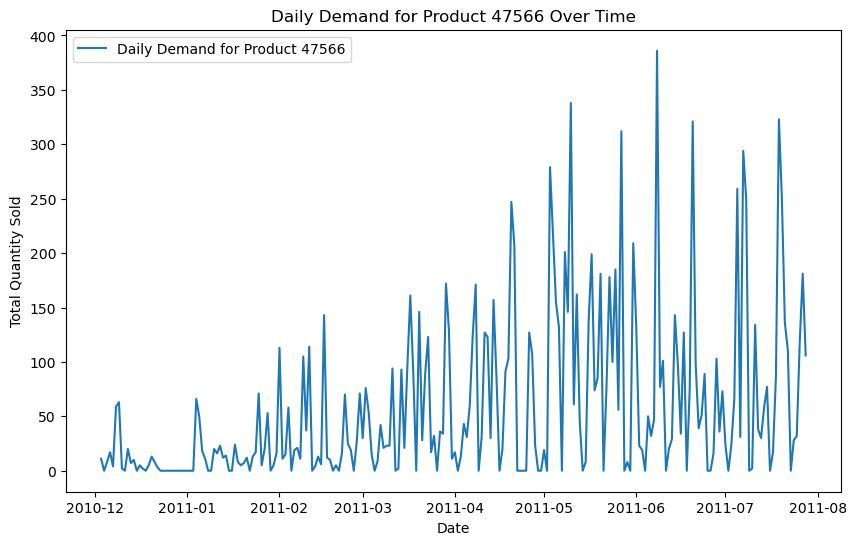

In [18]:
#StockCode 47566 - exploratory data analysis
plt.figure(figsize=(10, 6))
plt.plot(product_data_4.index, product_data_4['TotalQuantity'], label=f'Daily Demand for Product {product_id}')
plt.title(f'Daily Demand for Product {product_id} Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.show()

In [19]:
#StockCode 20725 - single product for forecasting
product_id = top10_products[4] 
product_data_5 = product_demand[product_demand['StockCode'] == product_id].copy()
product_data_5.set_index('Date', inplace=True)

#handle missing dates (fill missing dates with zero sales - assuming they paused sales for a day off)
product_data_5 = product_data_5.asfreq('D').fillna(0)

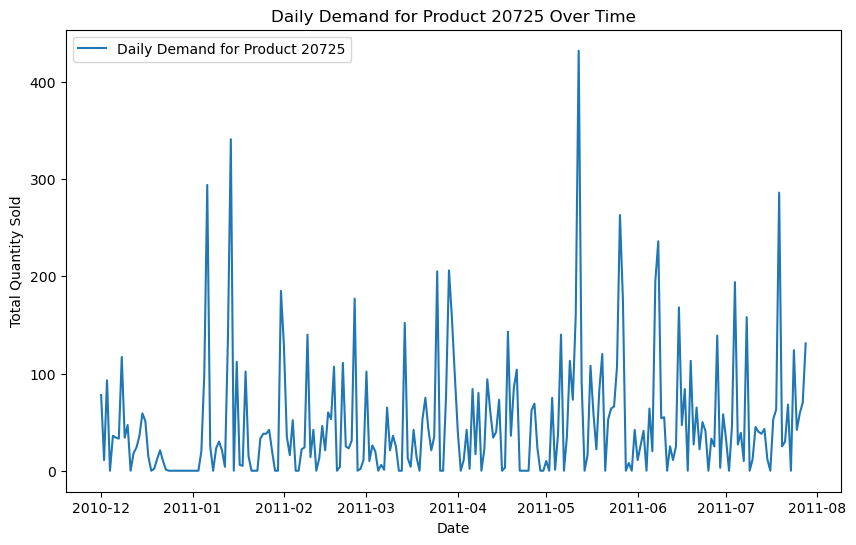

In [20]:
#StockCode 20725 - exploratory data analysis
plt.figure(figsize=(10, 6))
plt.plot(product_data_5.index, product_data_5['TotalQuantity'], label=f'Daily Demand for Product {product_id}')
plt.title(f'Daily Demand for Product {product_id} Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.show()

In [21]:
#StockCode 21212 - single product for forecasting
product_id = top10_products[5] 
product_data_6 = product_demand[product_demand['StockCode'] == product_id].copy()
product_data_6.set_index('Date', inplace=True)

#handle missing dates (fill missing dates with zero sales - assuming they paused sales for a day off)
product_data_6 = product_data_6.asfreq('D').fillna(0)

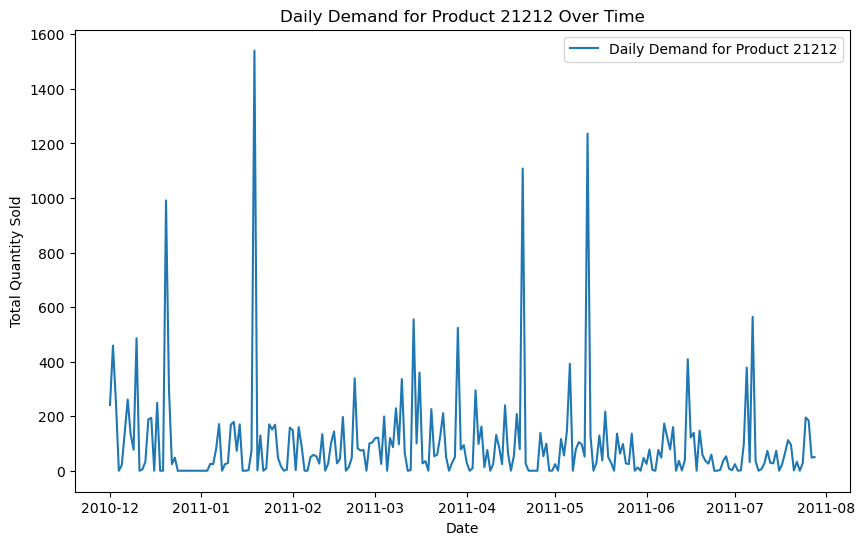

In [22]:
#StockCode 21212 - exploratory data analysis
plt.figure(figsize=(10, 6))
plt.plot(product_data_6.index, product_data_6['TotalQuantity'], label=f'Daily Demand for Product {product_id}')
plt.title(f'Daily Demand for Product {product_id} Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.show()

In [23]:
#StockCode 22720 - single product for forecasting
product_id = top10_products[6] 
product_data_7 = product_demand[product_demand['StockCode'] == product_id].copy()
product_data_7.set_index('Date', inplace=True)

#handle missing dates (fill missing dates with zero sales - assuming they paused sales for a day off)
product_data_7 = product_data_7.asfreq('D').fillna(0)

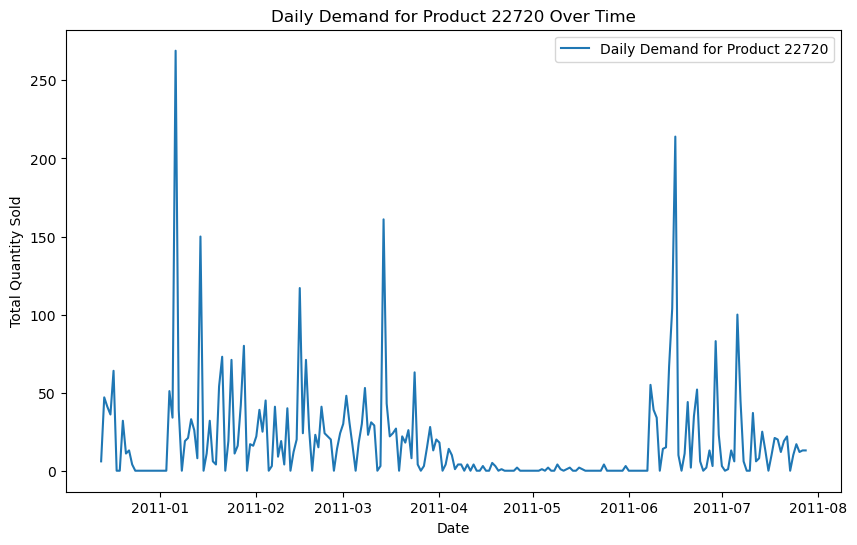

In [24]:
#StockCode 22720 - exploratory data analysis
plt.figure(figsize=(10, 6))
plt.plot(product_data_7.index, product_data_7['TotalQuantity'], label=f'Daily Demand for Product {product_id}')
plt.title(f'Daily Demand for Product {product_id} Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.show()

In [25]:
#StockCode 84879 - single product for forecasting
product_id = top10_products[7] 
product_data_8 = product_demand[product_demand['StockCode'] == product_id].copy()
product_data_8.set_index('Date', inplace=True)

#handle missing dates (fill missing dates with zero sales - assuming they paused sales for a day off)
product_data_8 = product_data_8.asfreq('D').fillna(0)

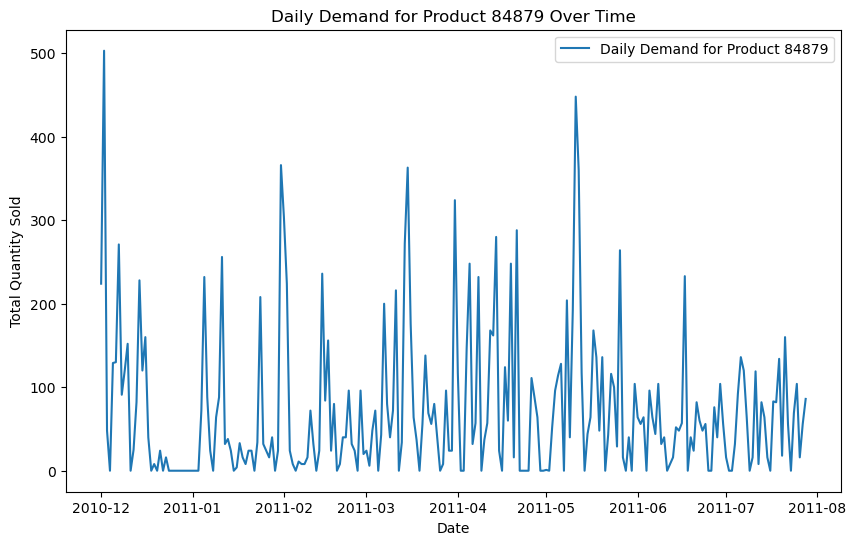

In [26]:
#StockCode 84879 - exploratory data analysis
plt.figure(figsize=(10, 6))
plt.plot(product_data_8.index, product_data_8['TotalQuantity'], label=f'Daily Demand for Product {product_id}')
plt.title(f'Daily Demand for Product {product_id} Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.show()

In [27]:
#StockCode 22457 - single product for forecasting
product_id = top10_products[8] 
product_data_9 = product_demand[product_demand['StockCode'] == product_id].copy()
product_data_9.set_index('Date', inplace=True)

#handle missing dates (fill missing dates with zero sales - assuming they paused sales for a day off)
product_data_9 = product_data_9.asfreq('D').fillna(0)

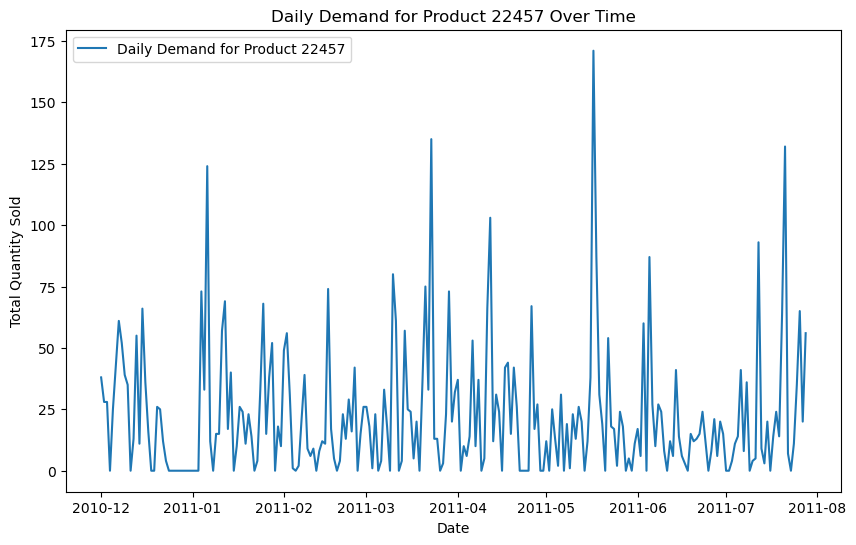

In [28]:
#StockCode 22457 - exploratory data analysis
plt.figure(figsize=(10, 6))
plt.plot(product_data_9.index, product_data_9['TotalQuantity'], label=f'Daily Demand for Product {product_id}')
plt.title(f'Daily Demand for Product {product_id} Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.show()

In [29]:
#StockCode 22383 - single product for forecasting
product_id = top10_products[9] 
product_data_10 = product_demand[product_demand['StockCode'] == product_id].copy()
product_data_10.set_index('Date', inplace=True)

#handle missing dates (fill missing dates with zero sales - assuming they paused sales for a day off)
product_data_10 = product_data_10.asfreq('D').fillna(0)

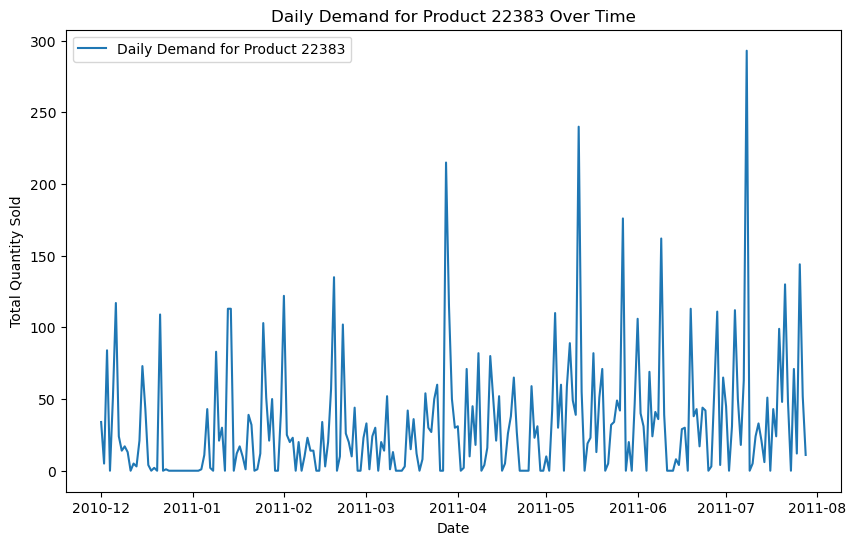

In [30]:
#StockCode 22383 - exploratory data analysis
plt.figure(figsize=(10, 6))
plt.plot(product_data_10.index, product_data_10['TotalQuantity'], label=f'Daily Demand for Product {product_id}')
plt.title(f'Daily Demand for Product {product_id} Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.show()

**All Top Products Daily Demand Graph**

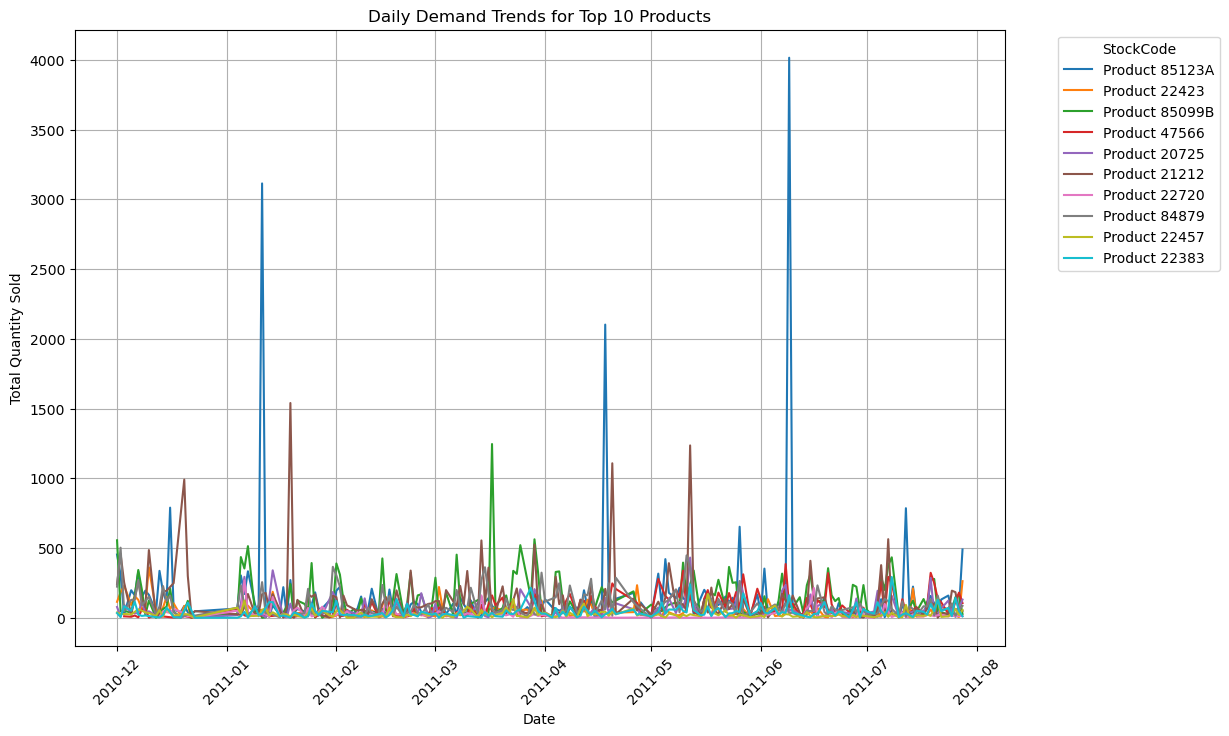

In [31]:
#set the figure size
plt.figure(figsize=(12, 8))

#loop through each product in the top 10
for product_id in top10_products:
    #filter data for the specific product
    product_data = product_demand[product_demand['StockCode'] == product_id]
    
    #plot the product's demand trend
    plt.plot(product_data['Date'], product_data['TotalQuantity'], label=f'Product {product_id}')

#the plot
plt.title("Daily Demand Trends for Top 10 Products")
plt.xlabel("Date")
plt.ylabel("Total Quantity Sold")
plt.legend(title="StockCode", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**D. Analysis**

The primary technique used in this project was time series analysis, specifically the ARIMA (AutoRegressive Integrated Moving Average) forecasting model. In addition to ARIMA, a few other techniques were used to organize and prepare the data for time series analysis. After loading and cleaning the dataset, the product data needed to be aggregated by daily product demand for the top ten products sold by the e-commerce business. Visualizations of demand trends were created using MatPlotLib and Seaborn. We tested for stationarity on product data once the data was clean and organized. The Augmented Dickey-Fuller test was performed on the top ten products to ensure the data was stationary. To complete the ARIMA models, the product data must be stationary. One of the products, Product 4 – 47566, was not stationary and clearly showed a trend on the Daily Demand graph (Cell 44 Output - graph on the left).   

In [32]:
#complete Adfuller for each top 10 product to ensure stationary data
#StockCode - 85123A - perform the Augmented Dickey-Fuller test (DataCamp 2024)
adf_product_1 = adfuller(product_data_1['TotalQuantity'])

print(f"ADF Statistic (Original): {adf_product_1[0]:.4f}")
print(f"p-value (Original): {adf_product_1[1]:.4f}")

if adf_product_1[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

ADF Statistic (Original): -15.5628
p-value (Original): 0.0000
Interpretation: The original series is Stationary.



In [33]:
#StockCode - 22423 - perform the Augmented Dickey-Fuller test (DataCamp 2024)
adf_product_2 = adfuller(product_data_2['TotalQuantity'])

print(f"ADF Statistic (Original): {adf_product_2[0]:.4f}")
print(f"p-value (Original): {adf_product_2[1]:.4f}")

if adf_product_2[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

ADF Statistic (Original): -4.5173
p-value (Original): 0.0002
Interpretation: The original series is Stationary.



In [34]:
#StockCode - 85099B - perform the Augmented Dickey-Fuller test (DataCamp 2024)
adf_product_3 = adfuller(product_data_3['TotalQuantity'])

print(f"ADF Statistic (Original): {adf_product_3[0]:.4f}")
print(f"p-value (Original): {adf_product_3[1]:.4f}")

if adf_product_3[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

ADF Statistic (Original): -13.4199
p-value (Original): 0.0000
Interpretation: The original series is Stationary.



In [35]:
#StockCode - 47566 - perform the Augmented Dickey-Fuller test (DataCamp 2024)
adf_product_4 = adfuller(product_data_4['TotalQuantity'])

print(f"ADF Statistic (Original): {adf_product_4[0]:.4f}")
print(f"p-value (Original): {adf_product_4[1]:.4f}")

if adf_product_4[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

ADF Statistic (Original): -1.4443
p-value (Original): 0.5608
Interpretation: The original series is Non-Stationary.



In [36]:
#StockCode - 20725 - perform the Augmented Dickey-Fuller test (DataCamp 2024)
adf_product_5 = adfuller(product_data_5['TotalQuantity'])

print(f"ADF Statistic (Original): {adf_product_5[0]:.4f}")
print(f"p-value (Original): {adf_product_5[1]:.4f}")

if adf_product_5[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

ADF Statistic (Original): -12.9369
p-value (Original): 0.0000
Interpretation: The original series is Stationary.



In [37]:
#StockCode - 21212 - perform the Augmented Dickey-Fuller test (DataCamp 2024)
adf_product_6 = adfuller(product_data_6['TotalQuantity'])

print(f"ADF Statistic (Original): {adf_product_6[0]:.4f}")
print(f"p-value (Original): {adf_product_6[1]:.4f}")

if adf_product_6[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

ADF Statistic (Original): -15.4231
p-value (Original): 0.0000
Interpretation: The original series is Stationary.



In [38]:
#StockCode - 22720 - perform the Augmented Dickey-Fuller test (DataCamp 2024)
adf_product_7 = adfuller(product_data_7['TotalQuantity'])

print(f"ADF Statistic (Original): {adf_product_7[0]:.4f}")
print(f"p-value (Original): {adf_product_7[1]:.4f}")

if adf_product_7[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

ADF Statistic (Original): -3.4709
p-value (Original): 0.0088
Interpretation: The original series is Stationary.



In [39]:
#StockCode - 84879 - perform the Augmented Dickey-Fuller test (DataCamp 2024)
adf_product_8 = adfuller(product_data_8['TotalQuantity'])

print(f"ADF Statistic (Original): {adf_product_8[0]:.4f}")
print(f"p-value (Original): {adf_product_8[1]:.4f}")

if adf_product_8[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

ADF Statistic (Original): -11.4877
p-value (Original): 0.0000
Interpretation: The original series is Stationary.



In [40]:
#StockCode - 22457 - perform the Augmented Dickey-Fuller test (DataCamp 2024)
adf_product_9 = adfuller(product_data_9['TotalQuantity'])

print(f"ADF Statistic (Original): {adf_product_9[0]:.4f}")
print(f"p-value (Original): {adf_product_9[1]:.4f}")

if adf_product_9[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

ADF Statistic (Original): -12.7080
p-value (Original): 0.0000
Interpretation: The original series is Stationary.



In [41]:
#StockCode - 22383 - perform the Augmented Dickey-Fuller test (DataCamp 2024)
adf_product_10 = adfuller(product_data_10['TotalQuantity'])

print(f"ADF Statistic (Original): {adf_product_10[0]:.4f}")
print(f"p-value (Original): {adf_product_10[1]:.4f}")

if adf_product_10[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

ADF Statistic (Original): -4.4149
p-value (Original): 0.0003
Interpretation: The original series is Stationary.



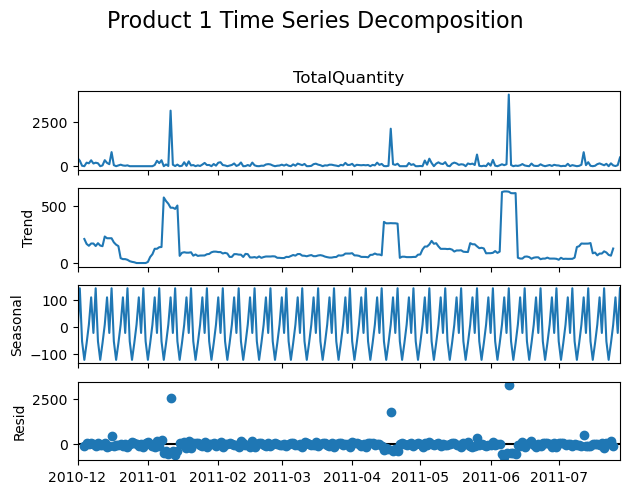

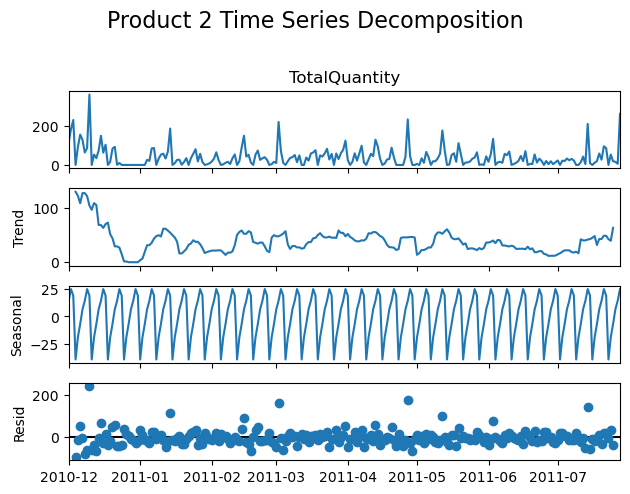

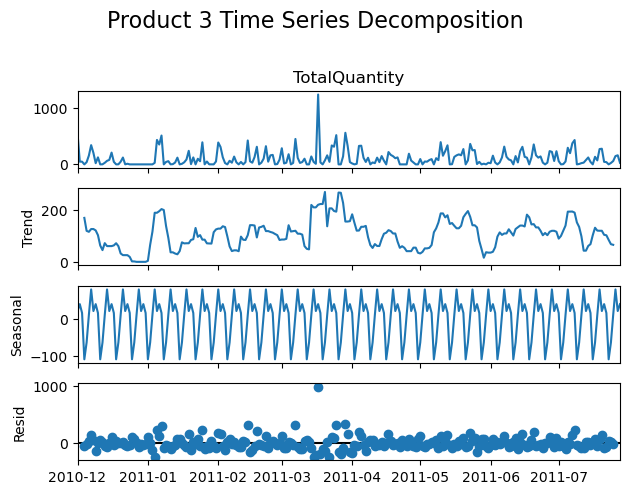

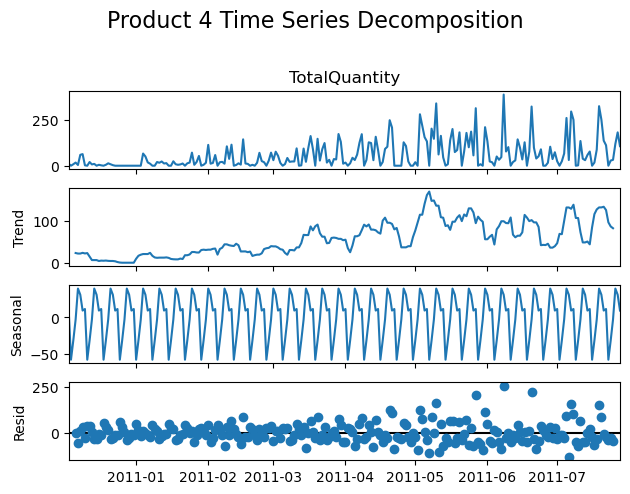

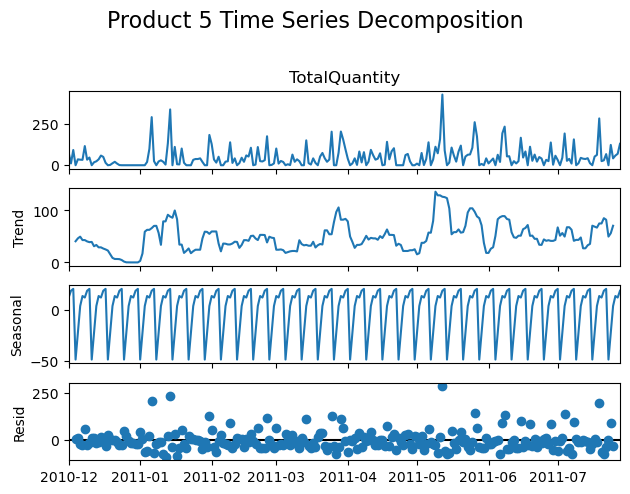

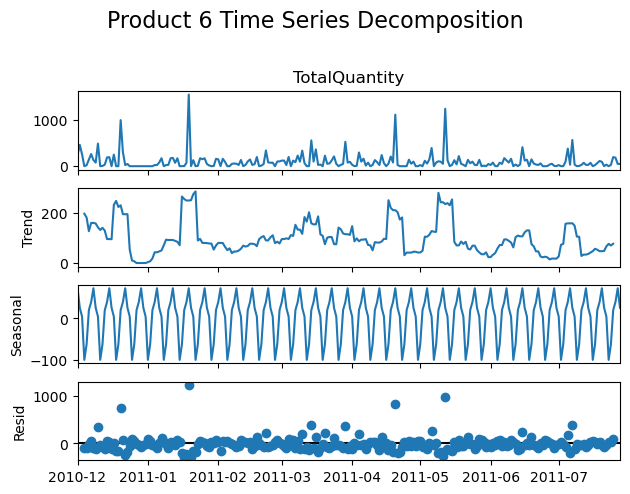

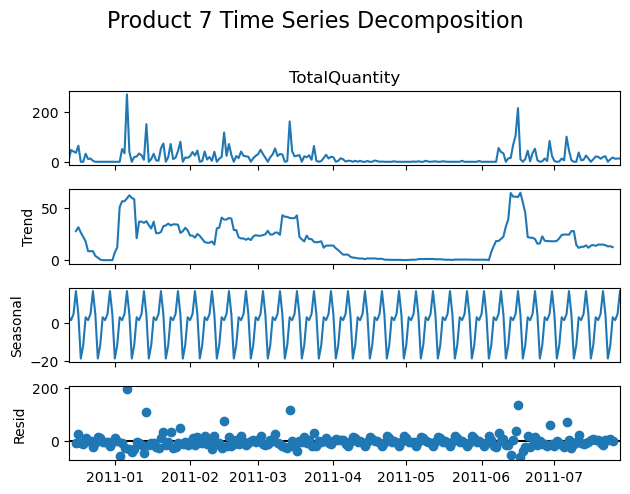

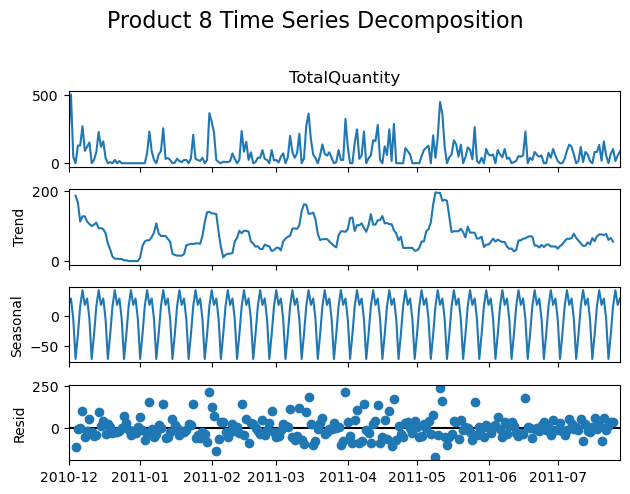

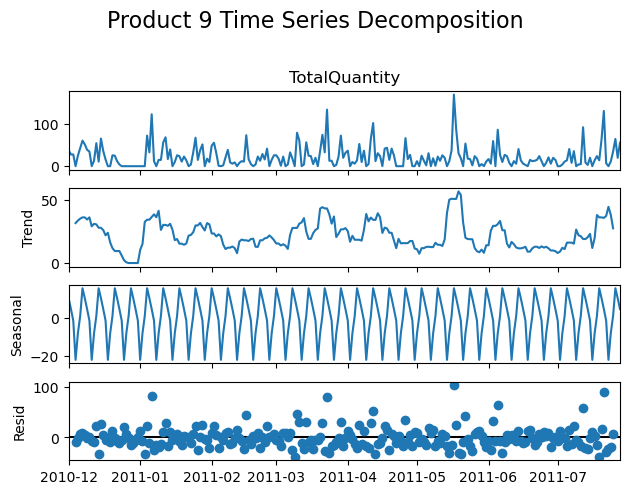

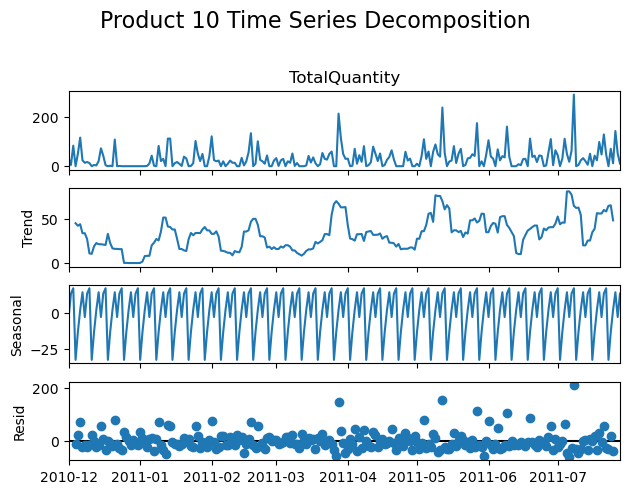

In [42]:
#decompose the Time Series (Trend, Seasonality, Residuals) for each Top 10 Product
decomposition = seasonal_decompose(product_data_1['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 1 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

decomposition = seasonal_decompose(product_data_2['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 2 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

decomposition = seasonal_decompose(product_data_3['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 3 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

decomposition = seasonal_decompose(product_data_4['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 4 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

decomposition = seasonal_decompose(product_data_5['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 5 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

decomposition = seasonal_decompose(product_data_6['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 6 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

decomposition = seasonal_decompose(product_data_7['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 7 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

decomposition = seasonal_decompose(product_data_8['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 8 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

decomposition = seasonal_decompose(product_data_9['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 9 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

decomposition = seasonal_decompose(product_data_10['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 10 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

After completing a stationarity check, the data for each product was split into testing and training datasets before moving on to differencing (again, only one product required this step). Once those data frames were created, Product 4 was differenced to make the data stationary (Cell 44 - Graph on the right).  

In [43]:
#train-test split for each top 10 product
train_data_prod_1 = product_data_1[['TotalQuantity']][:-30]
test_data_prod_1 = product_data_1[['TotalQuantity']][-30:]

train_data_prod_2 = product_data_2[['TotalQuantity']][:-30]
test_data_prod_2 = product_data_2[['TotalQuantity']][-30:]

train_data_prod_3 = product_data_3[['TotalQuantity']][:-30]
test_data_prod_3 = product_data_3[['TotalQuantity']][-30:]

train_data_prod_4 = product_data_4[['TotalQuantity']][:-30]
test_data_prod_4 = product_data_4[['TotalQuantity']][-30:]

train_data_prod_5 = product_data_5[['TotalQuantity']][:-30]
test_data_prod_5 = product_data_5[['TotalQuantity']][-30:]

train_data_prod_6 = product_data_6[['TotalQuantity']][:-30]
test_data_prod_6 = product_data_6[['TotalQuantity']][-30:]

train_data_prod_7 = product_data_7[['TotalQuantity']][:-30]
test_data_prod_7 = product_data_7[['TotalQuantity']][-30:]

train_data_prod_8 = product_data_8[['TotalQuantity']][:-30]
test_data_prod_8 = product_data_8[['TotalQuantity']][-30:]

train_data_prod_9 = product_data_9[['TotalQuantity']][:-30]
test_data_prod_9 = product_data_9[['TotalQuantity']][-30:]

train_data_prod_10 = product_data_10[['TotalQuantity']][:-30]
test_data_prod_10 = product_data_10[['TotalQuantity']][-30:]

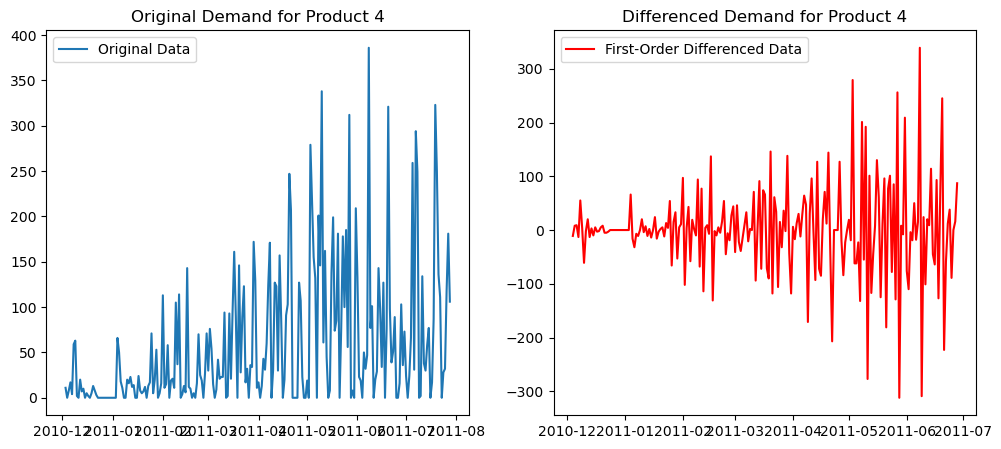

ADF Statistic: -7.3927331179159825
P-Value: 7.922430382371286e-11
Data is stationary after differencing.


In [44]:
#only 1 product for quantity sold is not stationary
#differencing for product 4 - StockCode - 47566
#first-order differencing
train_data_prod_4['TotalQuantity'] = train_data_prod_4['TotalQuantity'].diff()

#drop NaN values from differencing
train_data_prod_4.dropna(inplace=True)

#plot Original vs Differenced Data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(product_data_4['TotalQuantity'], label='Original Data')
plt.title('Original Demand for Product 4')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_data_prod_4['TotalQuantity'], label='First-Order Differenced Data', color='red')
plt.title('Differenced Demand for Product 4')
plt.legend()
plt.show()

#perform Augmented Dickey-Fuller again
adf_test_diffproduct4 = adfuller(train_data_prod_4['TotalQuantity'])
print(f"ADF Statistic: {adf_test_diffproduct4[0]}")
print(f"P-Value: {adf_test_diffproduct4[1]}")

if adf_test_diffproduct4[1] < 0.05:
    print("Data is stationary after differencing.")
else:
    print("Data is still not stationary. Consider additional differencing or transformations.")

Once stationarity was good for all products, we created seasonal decomposition diagrams for each product using statsmodel. This separated the time series data into trend, seasonality, and residual components. Then, the Autocorrelation (ACF) and Partial Autocorrelation (PACF) Functions plots were used to determine the appropriate AR and MA terms for the ARIMA models. 

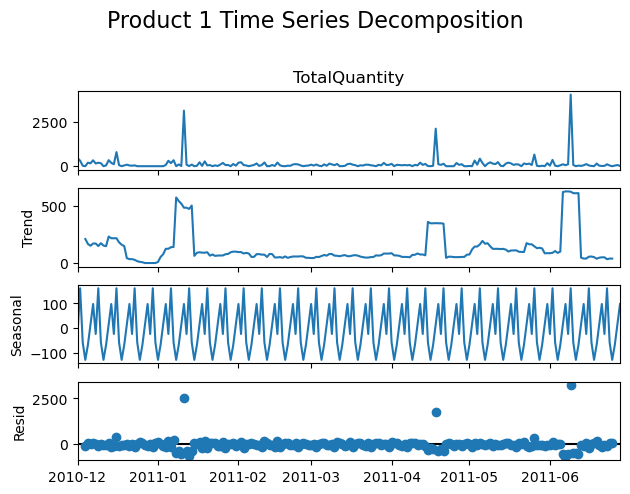

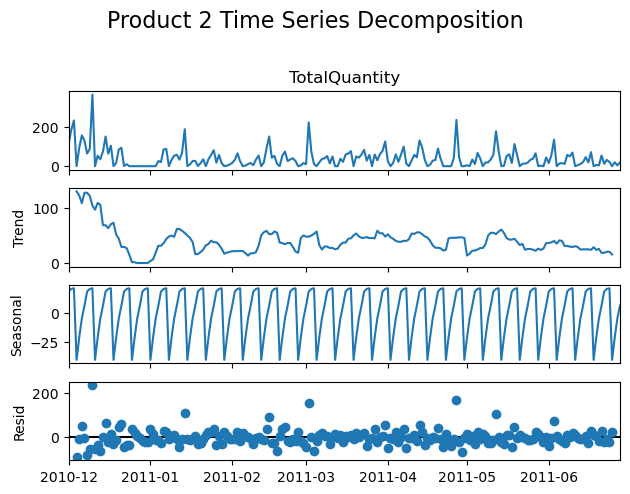

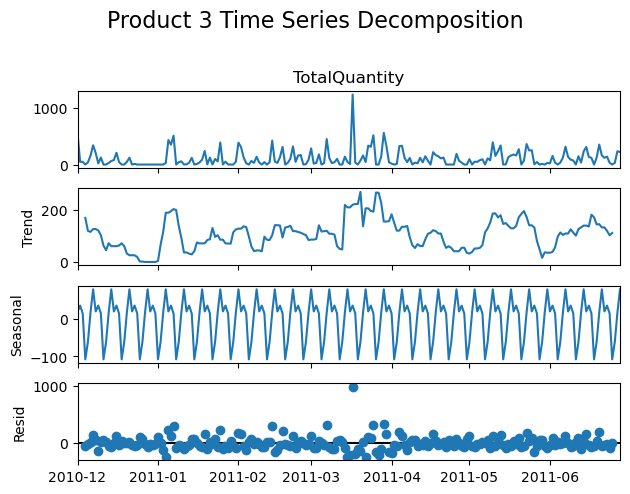

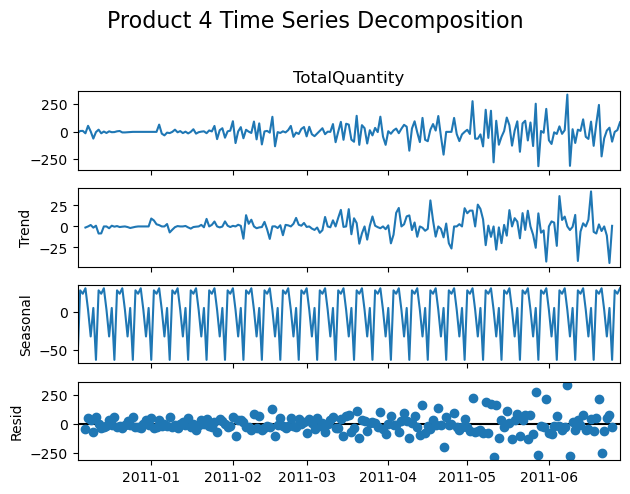

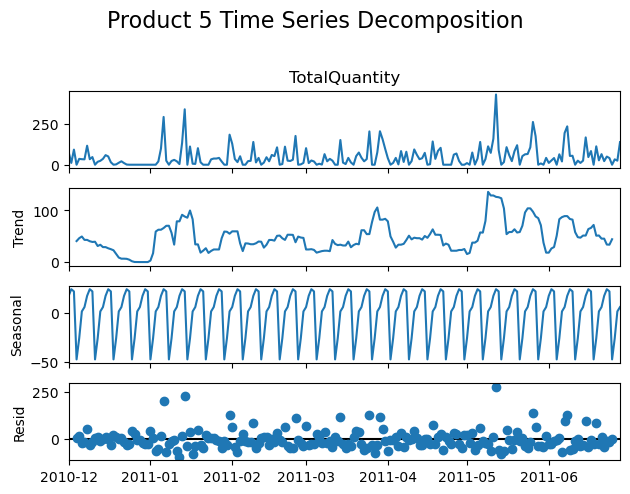

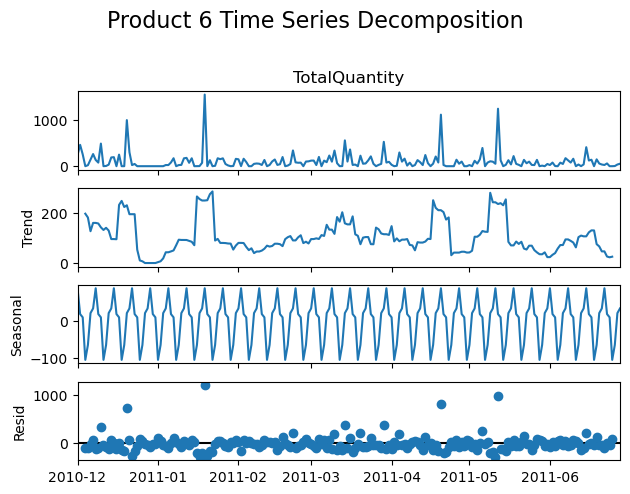

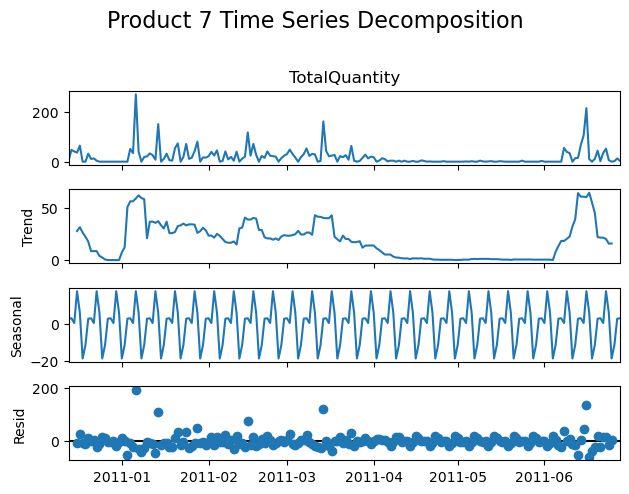

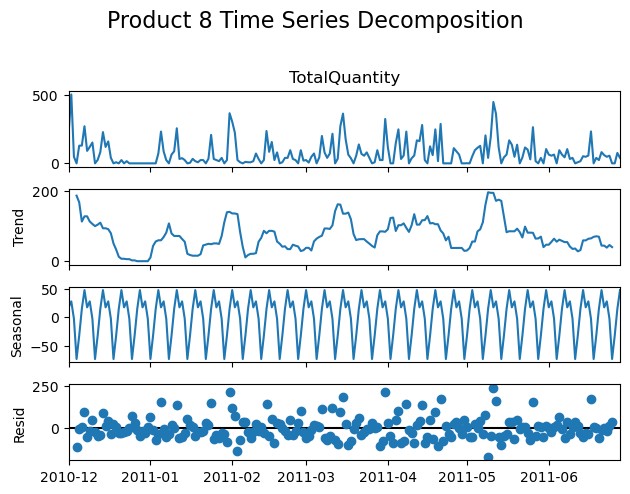

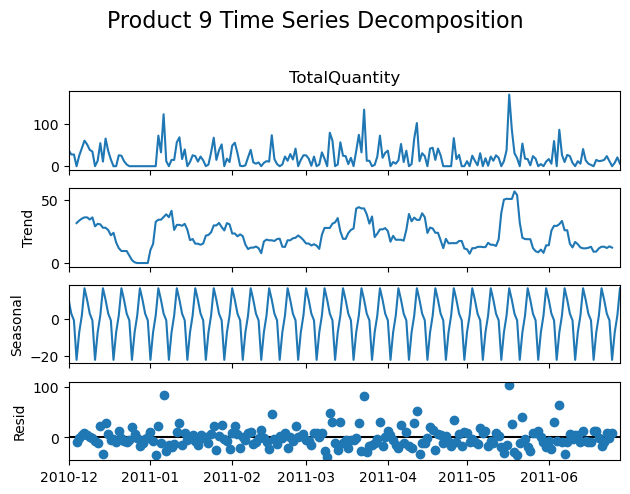

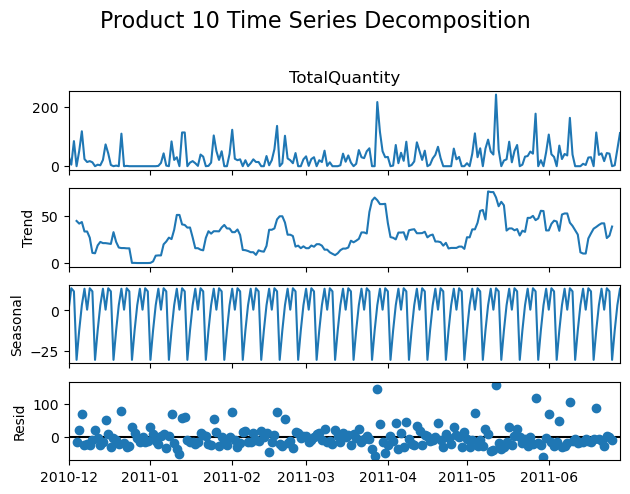

In [45]:
#data is now stationary for all top 10 products
#decompose the Time Series (Trend, Seasonality, Residuals) for each Top 10 Product
decomposition = seasonal_decompose(train_data_prod_1['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 1 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

decomposition = seasonal_decompose(train_data_prod_2['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 2 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

decomposition = seasonal_decompose(train_data_prod_3['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 3 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

decomposition = seasonal_decompose(train_data_prod_4['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 4 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

decomposition = seasonal_decompose(train_data_prod_5['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 5 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

decomposition = seasonal_decompose(train_data_prod_6['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 6 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

decomposition = seasonal_decompose(train_data_prod_7['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 7 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

decomposition = seasonal_decompose(train_data_prod_8['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 8 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

decomposition = seasonal_decompose(train_data_prod_9['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 9 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

decomposition = seasonal_decompose(train_data_prod_10['TotalQuantity'], model='additive')
decomposition.plot()
plt.subplots_adjust(top=0.85)
plt.suptitle('Product 10 Time Series Decomposition', fontsize=16, y=1.02)
plt.show()

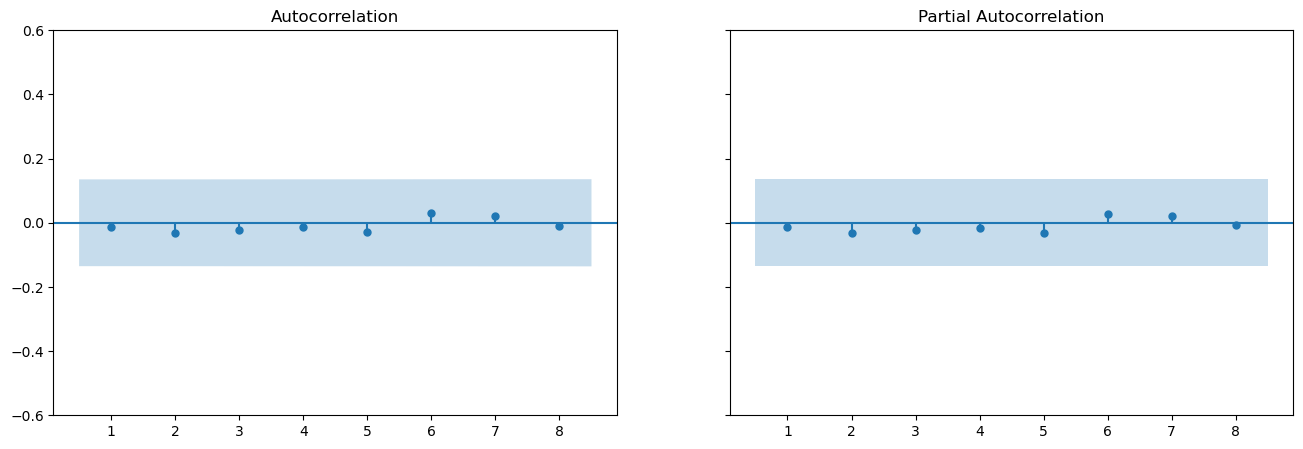

In [46]:
#Product 1 - Plot Autocorrelation and Partial Autocorrelation in one figure, sharing a y axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,5], sharey=True)

plot_acf(train_data_prod_1, lags=8, zero=False, ax=ax1)
plot_pacf(train_data_prod_1, lags=8, zero=False,ax=ax2)

plt.ylim(-0.6, 0.6);

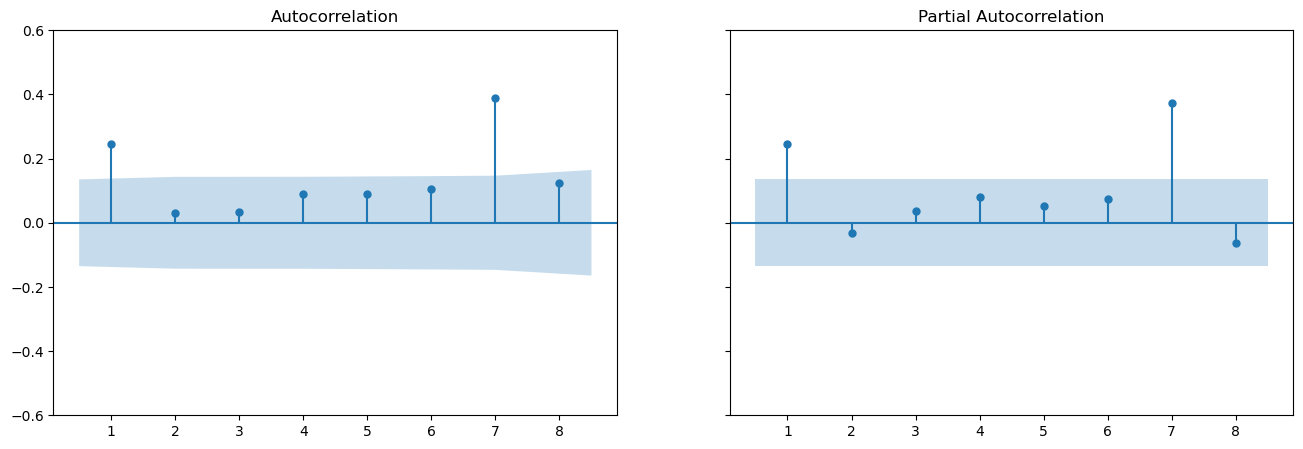

In [47]:
#Product 2 - Plot Autocorrelation and Partial Autocorrelation in one figure, sharing a y axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,5], sharey=True)

plot_acf(train_data_prod_2, lags=8, zero=False, ax=ax1)
plot_pacf(train_data_prod_2, lags=8, zero=False,ax=ax2)

plt.ylim(-0.6, 0.6);

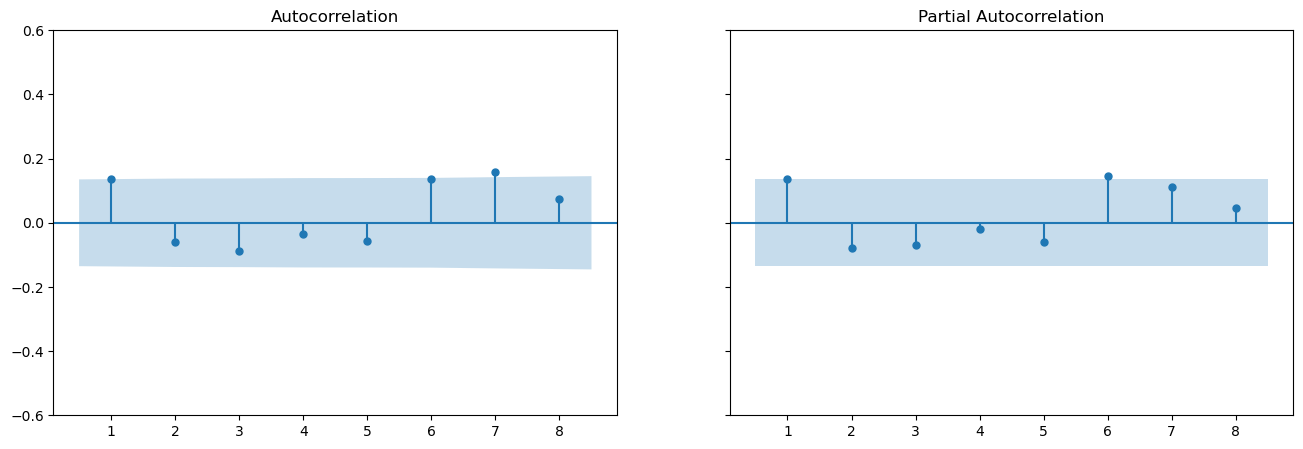

In [48]:
#Product 3 - Plot Autocorrelation and Partial Autocorrelation in one figure, sharing a y axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,5], sharey=True)

plot_acf(train_data_prod_3, lags=8, zero=False, ax=ax1)
plot_pacf(train_data_prod_3, lags=8, zero=False,ax=ax2)

plt.ylim(-0.6, 0.6);

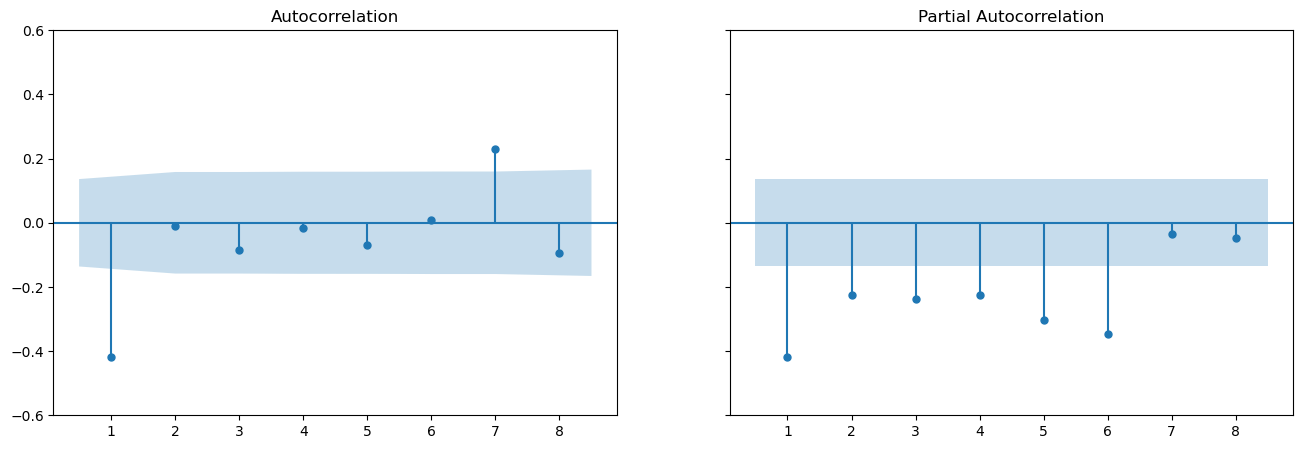

In [49]:
#Product 4 - Plot Autocorrelation and Partial Autocorrelation in one figure, sharing a y axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,5], sharey=True)

plot_acf(train_data_prod_4, lags=8, zero=False, ax=ax1)
plot_pacf(train_data_prod_4, lags=8, zero=False,ax=ax2)

plt.ylim(-0.6, 0.6);

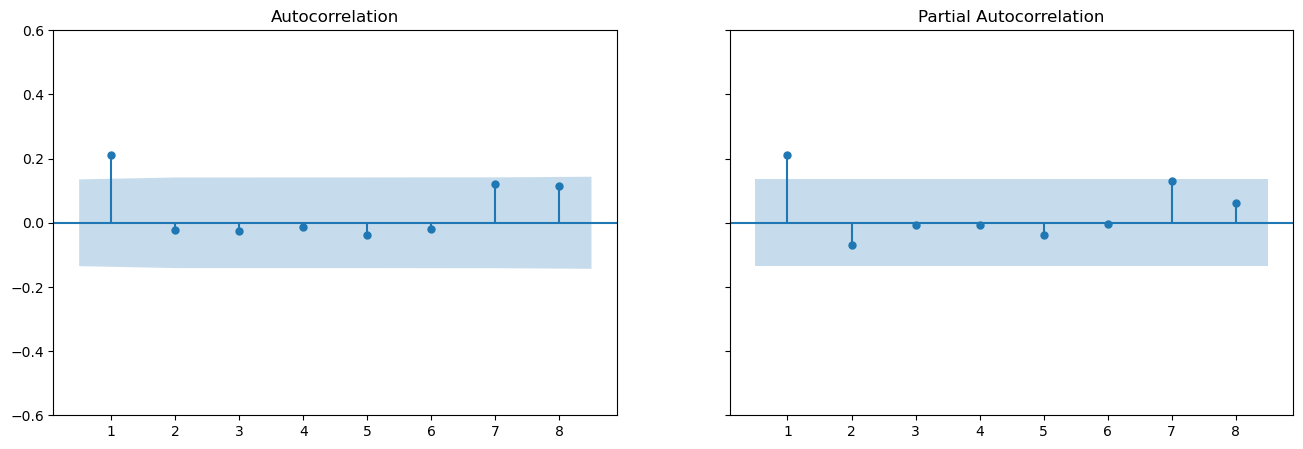

In [50]:
#Product 5 - Plot Autocorrelation and Partial Autocorrelation in one figure, sharing a y axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,5], sharey=True)

plot_acf(train_data_prod_5, lags=8, zero=False, ax=ax1)
plot_pacf(train_data_prod_5, lags=8, zero=False,ax=ax2)

plt.ylim(-0.6, 0.6);

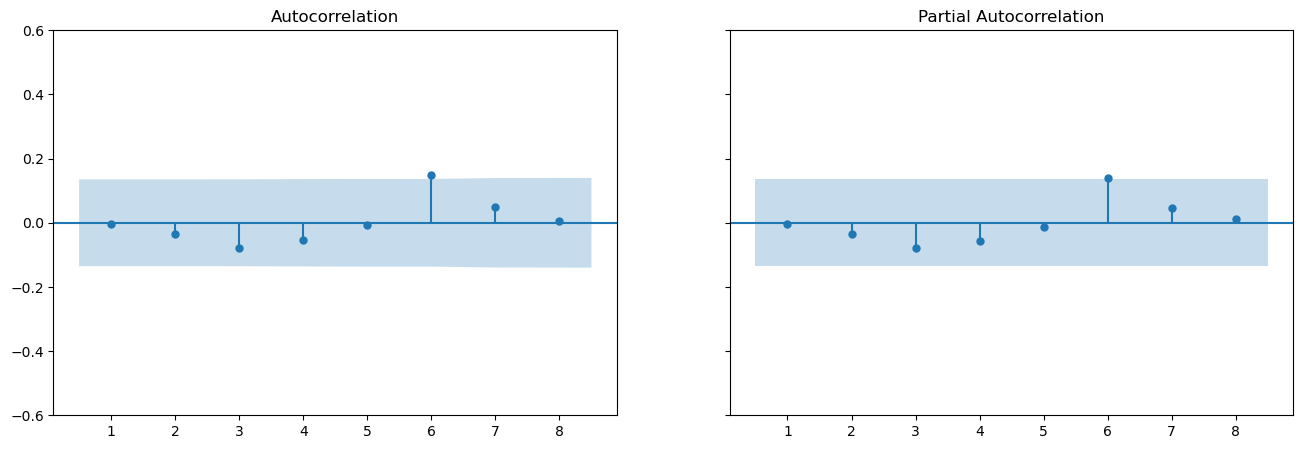

In [51]:
#Product 6 - Plot Autocorrelation and Partial Autocorrelation in one figure, sharing a y axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,5], sharey=True)

plot_acf(train_data_prod_6, lags=8, zero=False, ax=ax1)
plot_pacf(train_data_prod_6, lags=8, zero=False,ax=ax2)

plt.ylim(-0.6, 0.6);

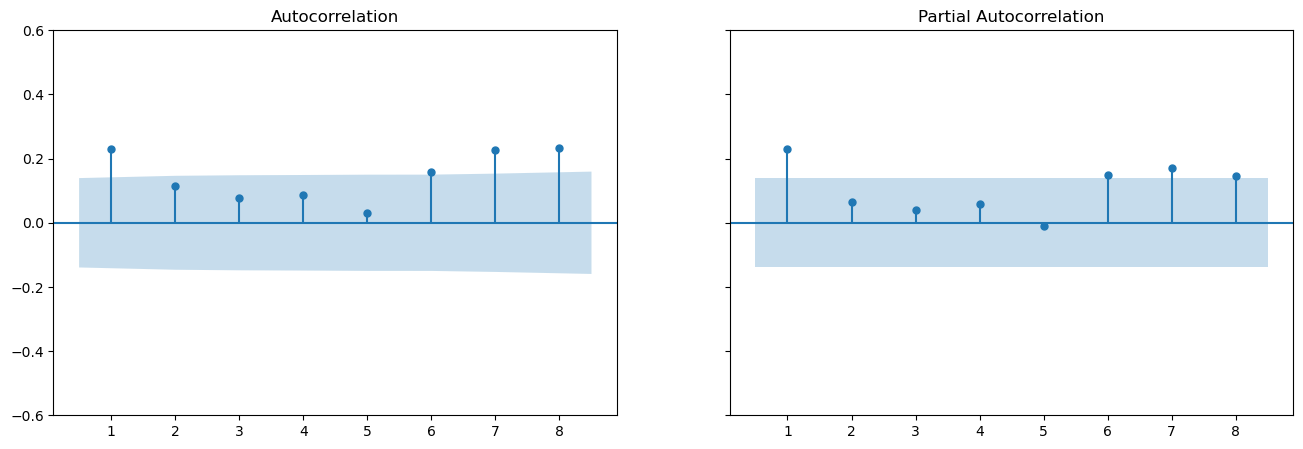

In [52]:
#Product 7 - Plot Autocorrelation and Partial Autocorrelation in one figure, sharing a y axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,5], sharey=True)

plot_acf(train_data_prod_7, lags=8, zero=False, ax=ax1)
plot_pacf(train_data_prod_7, lags=8, zero=False,ax=ax2)

plt.ylim(-0.6, 0.6);

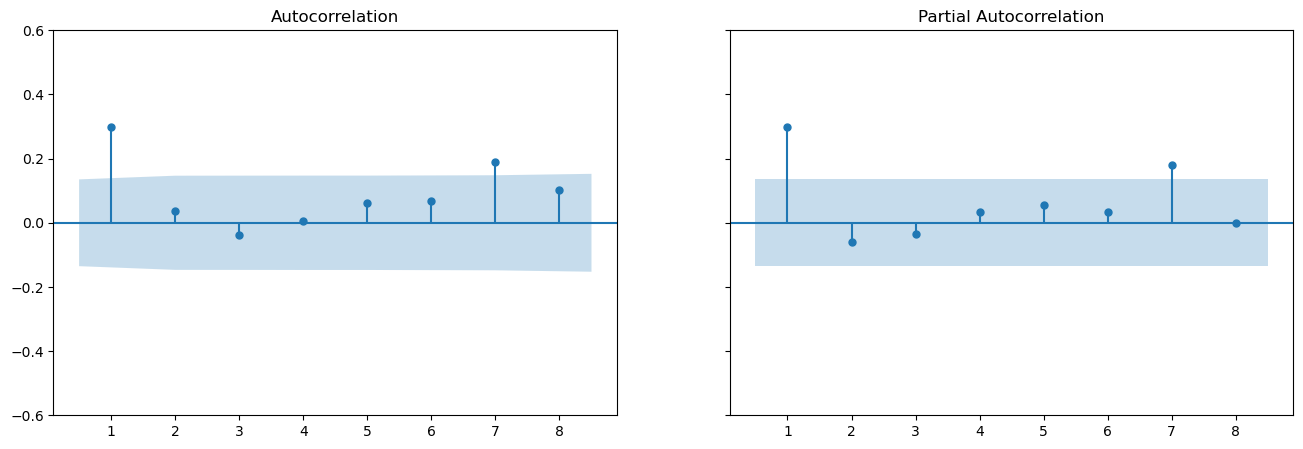

In [53]:
#Product 8 - Plot Autocorrelation and Partial Autocorrelation in one figure, sharing a y axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,5], sharey=True)

plot_acf(train_data_prod_8, lags=8, zero=False, ax=ax1)
plot_pacf(train_data_prod_8, lags=8, zero=False,ax=ax2)

plt.ylim(-0.6, 0.6);

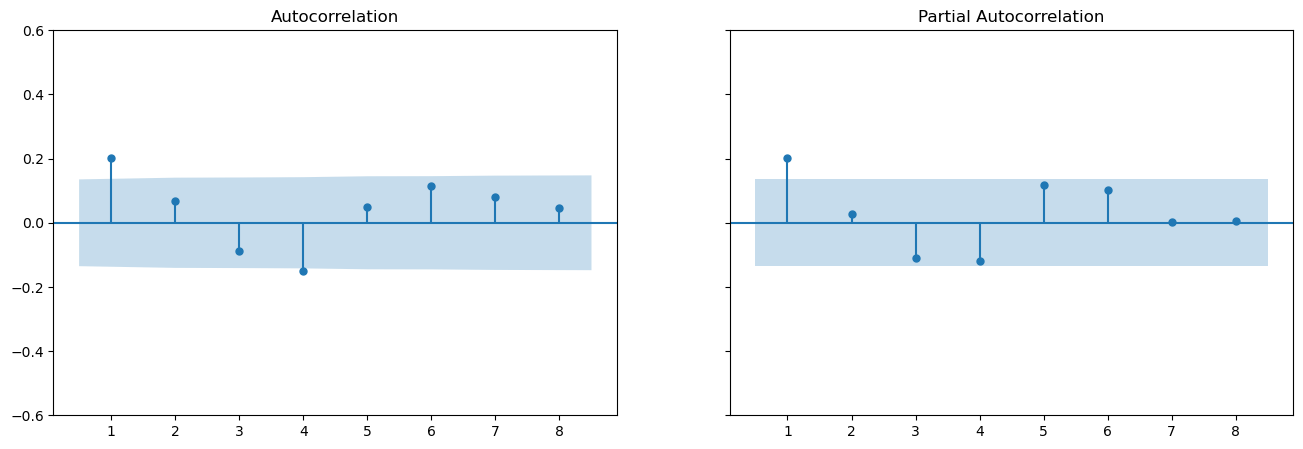

In [54]:
#Product 9 - Plot Autocorrelation and Partial Autocorrelation in one figure, sharing a y axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,5], sharey=True)

plot_acf(train_data_prod_9, lags=8, zero=False, ax=ax1)
plot_pacf(train_data_prod_9, lags=8, zero=False,ax=ax2)

plt.ylim(-0.6, 0.6);

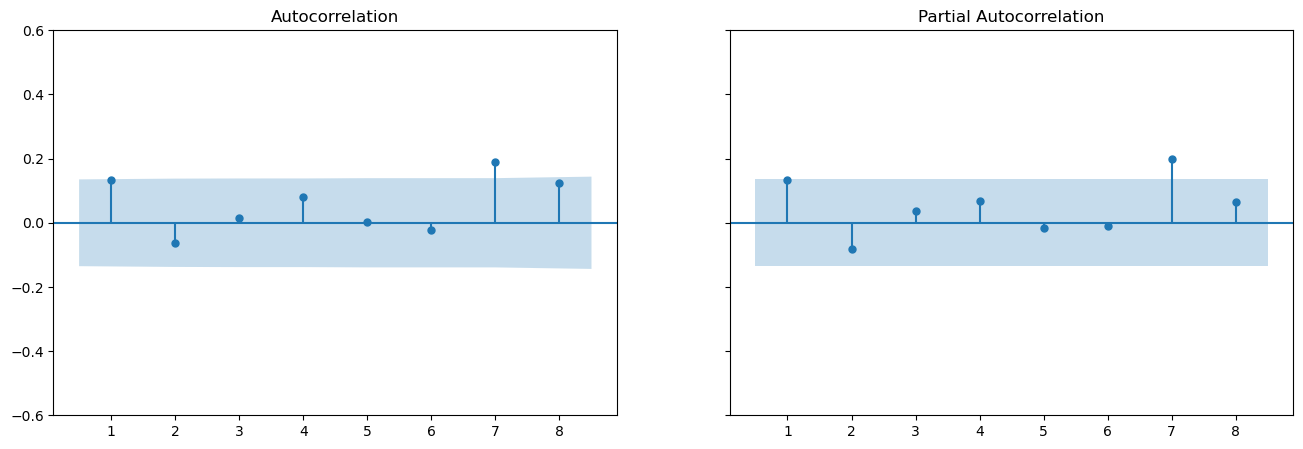

In [55]:
#Product 10 - Plot Autocorrelation and Partial Autocorrelation in one figure, sharing a y axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,5], sharey=True)

plot_acf(train_data_prod_10, lags=8, zero=False, ax=ax1)
plot_pacf(train_data_prod_10, lags=8, zero=False,ax=ax2)

plt.ylim(-0.6, 0.6);

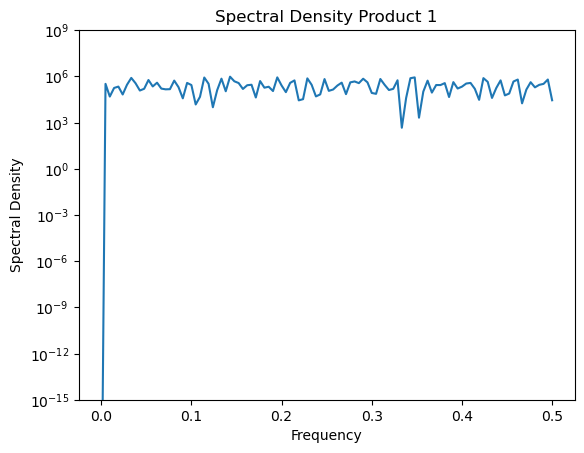

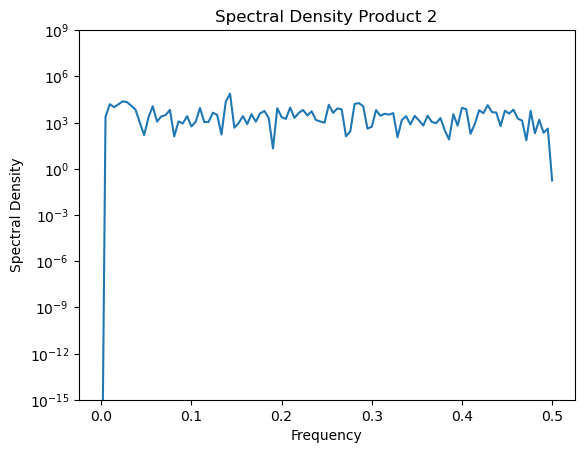

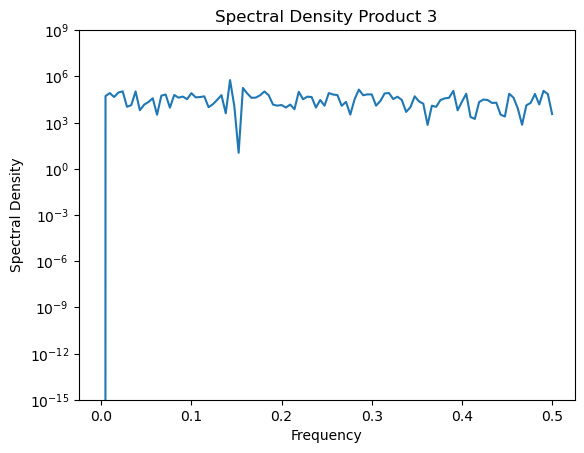

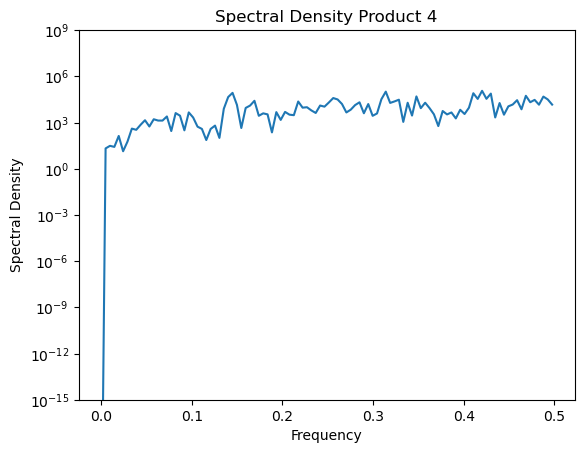

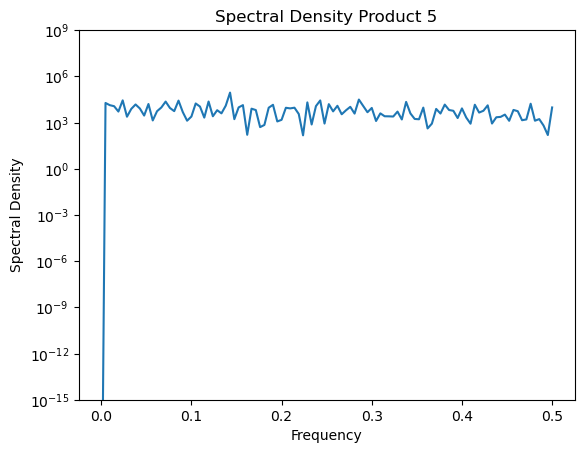

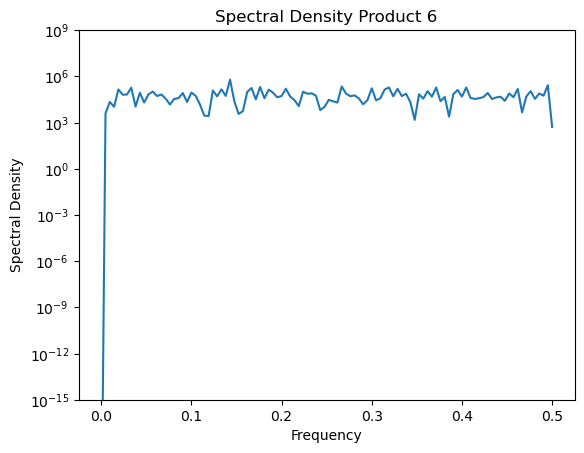

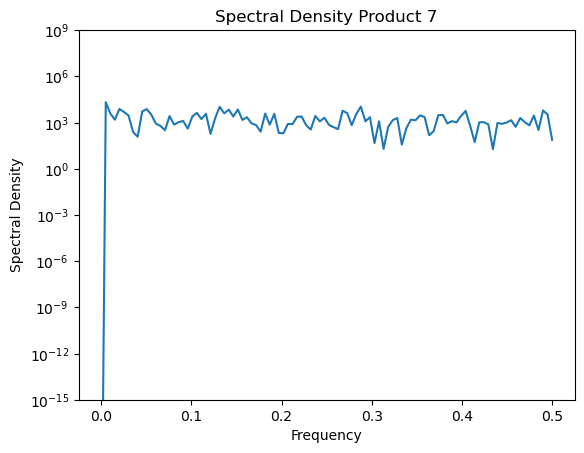

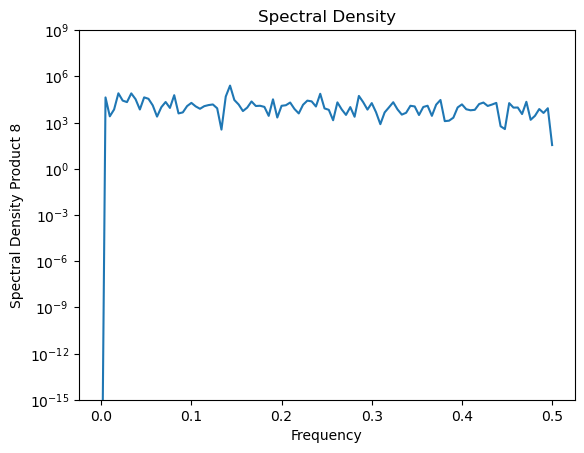

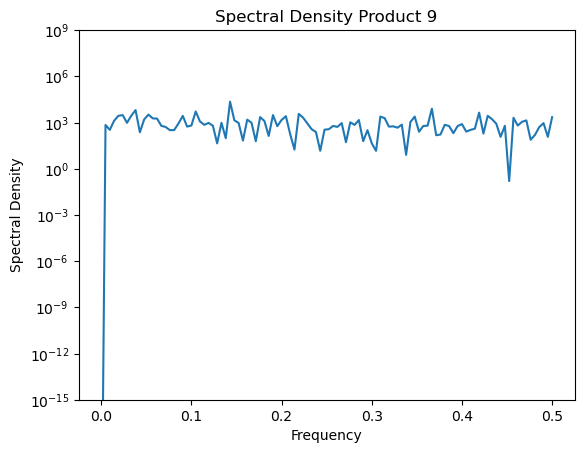

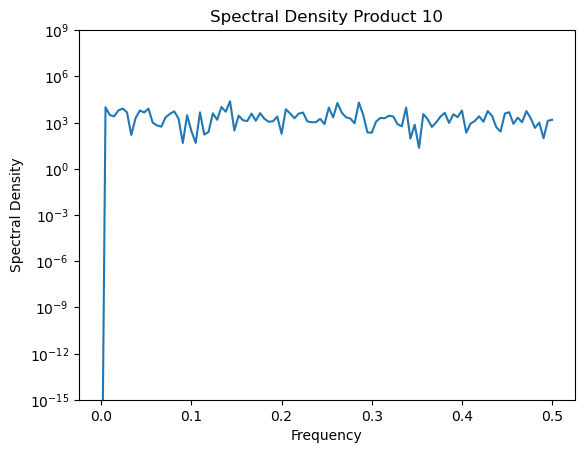

In [251]:
#Spectral Density
f, Pxx_den=signal.periodogram(train_data_prod_1['TotalQuantity'])
plt.semilogy(f,Pxx_den)
plt.ylim([1e-15,1e9])
plt.title('Spectral Density Product 1')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

f, Pxx_den=signal.periodogram(train_data_prod_2['TotalQuantity'])
plt.semilogy(f,Pxx_den)
plt.ylim([1e-15,1e9])
plt.title('Spectral Density Product 2')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

f, Pxx_den=signal.periodogram(train_data_prod_3['TotalQuantity'])
plt.semilogy(f,Pxx_den)
plt.ylim([1e-15,1e9])
plt.title('Spectral Density Product 3')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

f, Pxx_den=signal.periodogram(train_data_prod_4['TotalQuantity'])
plt.semilogy(f,Pxx_den)
plt.ylim([1e-15,1e9])
plt.title('Spectral Density Product 4')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

f, Pxx_den=signal.periodogram(train_data_prod_5['TotalQuantity'])
plt.semilogy(f,Pxx_den)
plt.ylim([1e-15,1e9])
plt.title('Spectral Density Product 5')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

f, Pxx_den=signal.periodogram(train_data_prod_6['TotalQuantity'])
plt.semilogy(f,Pxx_den)
plt.ylim([1e-15,1e9])
plt.title('Spectral Density Product 6')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

f, Pxx_den=signal.periodogram(train_data_prod_7['TotalQuantity'])
plt.semilogy(f,Pxx_den)
plt.ylim([1e-15,1e9])
plt.title('Spectral Density Product 7')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

f, Pxx_den=signal.periodogram(train_data_prod_8['TotalQuantity'])
plt.semilogy(f,Pxx_den)
plt.ylim([1e-15,1e9])
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density Product 8')
plt.show()

f, Pxx_den=signal.periodogram(train_data_prod_9['TotalQuantity'])
plt.semilogy(f,Pxx_den)
plt.ylim([1e-15,1e9])
plt.title('Spectral Density Product 9')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

f, Pxx_den=signal.periodogram(train_data_prod_10['TotalQuantity'])
plt.semilogy(f,Pxx_den)
plt.ylim([1e-15,1e9])
plt.title('Spectral Density Product 10')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

In addition to these diagrams, auto_arima was used to select and automate the ARIMA model selection process. The ACF and PACF graphs are additional support to ensure the auto_arima function selects the correct parameters. The pmdarima auto_arima function quickly analyzes the data provided and chooses the model with the lowest AIC value (Zajic 2022). The following are all the models and AIC values that the auto_arima function chose for each product:  

- Product 1 – ARIMA (0, 0, 0) AIC = 3097.223 - poor performance 
- Product. 2 – ARIMA (1, 1, 2) AIC = 2213.843 - moderate performance 
- Product 3 – ARIMA (0, 0, 1) AIC = 2698.300 - poor performance 
- Product 4 – ARIMA (5, 0, 1) AIC = 2321.269 - moderate performance 
- Product 5 – ARIMA (0, 1, 2) AIC = 2330.833 - moderate performance 
- Product 6 – ARIMA (0, 0, 0) AIC = 2799.106 - poor performance 
- Product 7 – ARIMA (1, 1, 1) AIC = 1940.366 - strong performance 
- Product 8 – ARIMA (1, 0, 0) AIC = 2481.825 - poor performance 
- Product 9 – ARIMA (1, 0, 0) AIC = 1958.129 - strong performance 
- Product 10 – ARIMA (2, 1, 1) AIC = 2132.085 - moderate performance 

In [57]:
#Product - 1: ARIMA model using auto_arima
from pmdarima import auto_arima
stepwise_fit=auto_arima(train_data_prod_1['TotalQuantity'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3105.077, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3097.223, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3099.196, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3099.212, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3117.054, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3101.215, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.280 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:                        SARIMAX   Log Likelihood               -1546.611
Date:                Sat, 08 Feb 2025   AIC                           3097.223
Time:                        21:46:17   BIC                           3103.917
Sample:                    12-01-2010   HQIC                          3099.929
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    126.4952     81.013      1.561      0.118     -32.287     285.278
sigma2      1.461e+05   7334.002     19.915      0.000    1.32e+05     1.6e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             44236.92
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                             7.98
Prob(H) (two-sided):                  0.06   Kurtosis:                        72.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
#Product - 2: ARIMA model using auto_arima
from pmdarima import auto_arima
stepwise_fit=auto_arima(train_data_prod_2['TotalQuantity'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2215.424, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2317.878, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2289.536, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2221.959, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2315.890, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2213.843, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2220.350, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2221.238, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2215.326, Time=0.68 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2219.971, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2219.421, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2218.455, Time=0.71 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 2.779 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1101.921
Date:                Sat, 08 Feb 2025   AIC                           2213.843
Time:                        21:46:19   BIC                           2230.554
Sample:                    12-01-2010   HQIC                          2220.599
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.8276      0.947     -0.874      0.382      -2.684       1.029
ar.L1         -0.8445      0.059    -14.205      0.000      -0.961      -0.728
ma.L1          0.0847      0.053      1.593      0.111      -0.020       0.189
ma.L2         -0.8740      0.045    -19.309      0.000      -0.963      -0.785
sigma2      2198.5907    152.456     14.421      0.000    1899.782    2497.400
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               332.19
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             1.22
Prob(H) (two-sided):                  0.03   Kurtosis:                         8.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
#Product - 3: ARIMA model using auto_arima
from pmdarima import auto_arima
stepwise_fit=auto_arima(train_data_prod_3['TotalQuantity'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2703.089, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2701.069, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2698.883, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2698.300, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2788.215, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2700.186, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2700.044, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2702.063, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2758.011, Time=0.04 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.030 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1346.150
Date:                Sat, 08 Feb 2025   AIC                           2698.300
Time:                        21:46:20   BIC                           2708.342
Sample:                    12-01-2010   HQIC                          2702.360
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    108.6336     17.788      6.107      0.000      73.769     143.498
ma.L1          0.1606      0.063      2.570      0.010       0.038       0.283
sigma2      2.164e+04   1052.978     20.555      0.000    1.96e+04    2.37e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              2931.86
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                             3.08
Prob(H) (two-sided):                  0.06   Kurtosis:                        20.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
#Product - 4: ARIMA model using auto_arima
from pmdarima import auto_arima
stepwise_fit=auto_arima(train_data_prod_4['TotalQuantity'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2431.051, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2393.154, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2429.056, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2384.258, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2374.104, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2365.345, Time=0.21 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=2347.325, Time=0.19 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=2321.693, Time=0.60 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=2323.553, Time=0.59 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=2321.269, Time=0.36 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=2321.337, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  207
Model:               SARIMAX(5, 0, 1)   Log Likelihood               -1153.635
Date:                Sat, 08 Feb 2025   AIC                           2321.269
Time:                        21:46:25   BIC                           2344.598
Sample:                    12-04-2010   HQIC                          2330.703
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0325      0.075      0.433      0.665      -0.115       0.180
ar.L2         -0.0818      0.081     -1.010      0.312      -0.240       0.077
ar.L3         -0.1766      0.064     -2.742      0.006      -0.303      -0.050
ar.L4         -0.1328      0.072     -1.842      0.065      -0.274       0.008
ar.L5         -0.1075      0.068     -1.587      0.113      -0.240       0.025
ma.L1         -0.8997      0.041    -22.214      0.000      -0.979      -0.820
sigma2      4009.7451    240.170     16.695      0.000    3539.021    4480.469
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               169.72
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              15.10   Skew:                             1.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
#Product - 5: ARIMA model using auto_arima
from pmdarima import auto_arima
stepwise_fit=auto_arima(train_data_prod_5['TotalQuantity'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2429.157, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2404.455, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2427.160, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2385.930, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2376.624, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2372.896, Time=0.38 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2368.811, Time=0.17 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2366.812, Time=0.23 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2370.898, Time=0.21 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2337.822, Time=0.76 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2336.352, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1162.416
Date:                Sat, 08 Feb 2025   AIC                           2330.833
Time:                        21:46:31   BIC                           2340.860
Sample:                    12-01-2010   HQIC                          2334.887
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7569      0.063    -11.930      0.000      -0.881      -0.633
ma.L2         -0.2217      0.065     -3.421      0.001      -0.349      -0.095
sigma2      3910.2196    229.299     17.053      0.000    3460.802    4359.637
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               629.63
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             2.23
Prob(H) (two-sided):                  0.24   Kurtosis:                        10.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
#Product - 6: ARIMA model using auto_arima
from pmdarima import auto_arima
stepwise_fit=auto_arima(train_data_prod_6['TotalQuantity'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2804.804, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2799.106, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2801.104, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2801.164, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2853.927, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2803.119, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.371 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:                        SARIMAX   Log Likelihood               -1397.553
Date:                Sat, 08 Feb 2025   AIC                           2799.106
Time:                        21:46:32   BIC                           2805.800
Sample:                    12-01-2010   HQIC                          2801.812
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    104.7571     26.028      4.025      0.000      53.743     155.771
sigma2      3.532e+04   1840.834     19.186      0.000    3.17e+04    3.89e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6769.28
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                             4.61
Prob(H) (two-sided):                  0.27   Kurtosis:                        29.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
#Product - 7: ARIMA model using auto_arima
from pmdarima import auto_arima
stepwise_fit=auto_arima(train_data_prod_7['TotalQuantity'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1944.485, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2034.471, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1997.282, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1943.820, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2032.471, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1942.363, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1944.362, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1944.362, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1942.473, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1982.973, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1940.366, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1941.820, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1995.283, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1942.365, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  198
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -967.183
Date:                Sat, 08 Feb 2025   AIC                           1940.366
Time:                        21:46:33   BIC                           1950.216
Sample:                    12-13-2010   HQIC                          1944.353
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1469      0.082      1.783      0.075      -0.015       0.308
ma.L1         -0.9381      0.037    -25.492      0.000      -1.010      -0.866
sigma2      1066.1635     35.306     30.198      0.000     996.965    1135.362
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5192.90
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             4.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
#Product - 8: ARIMA model using auto_arima
from pmdarima import auto_arima
stepwise_fit=auto_arima(train_data_prod_8['TotalQuantity'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2486.884, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2499.508, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2481.825, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2482.099, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2601.651, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2483.269, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2483.399, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2485.252, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2520.579, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.688 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1237.912
Date:                Sat, 08 Feb 2025   AIC                           2481.825
Time:                        21:46:34   BIC                           2491.866
Sample:                    12-01-2010   HQIC                          2485.884
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     51.0217     11.004      4.636      0.000      29.453      72.590
ar.L1          0.3045      0.053      5.780      0.000       0.201       0.408
sigma2      7655.5614    689.261     11.107      0.000    6304.635    9006.488
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               165.83
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             1.62
Prob(H) (two-sided):                  0.41   Kurtosis:                         5.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
#Product - 9: ARIMA model using auto_arima
from pmdarima import auto_arima
stepwise_fit=auto_arima(train_data_prod_9['TotalQuantity'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1964.769, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1958.129, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1959.057, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2078.474, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1959.973, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1960.055, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1961.707, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2008.724, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.820 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -976.064
Date:                Sat, 08 Feb 2025   AIC                           1958.129
Time:                        21:46:35   BIC                           1968.170
Sample:                    12-01-2010   HQIC                          1962.188
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     17.6048      3.052      5.767      0.000      11.622      23.588
ar.L1          0.2019      0.065      3.117      0.002       0.075       0.329
sigma2       636.8913     42.732     14.904      0.000     553.138     720.644
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               591.64
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             2.17
Prob(H) (two-sided):                  0.53   Kurtosis:                         9.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
#Product - 10: ARIMA model using auto_arima
from pmdarima import auto_arima
stepwise_fit=auto_arima(train_data_prod_10['TotalQuantity'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2243.188, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2211.862, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2241.199, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2185.360, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2169.503, Time=0.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2166.454, Time=0.11 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2164.305, Time=0.63 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2162.311, Time=0.23 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2164.464, Time=0.15 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2137.227, Time=0.62 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2135.446, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1062.043
Date:                Sat, 08 Feb 2025   AIC                           2132.085
Time:                        21:46:40   BIC                           2145.455
Sample:                    12-01-2010   HQIC                          2137.490
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1274      0.075      1.694      0.090      -0.020       0.275
ar.L2         -0.0999      0.103     -0.973      0.330      -0.301       0.101
ma.L1         -0.9753      0.022    -43.406      0.000      -1.019      -0.931
sigma2      1496.4891     78.797     18.992      0.000    1342.050    1650.928
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               552.63
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                             2.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
#Time Series Model -- Using p, d, q values from the auto_arima results -- Product 1 (ARIMA(0,0,0))
model1 = ARIMA(train_data_prod_1, order=(0, 0, 0), freq='D')
results1 = model1.fit()
print(results1.summary())

                               SARIMAX Results                                
Dep. Variable:          TotalQuantity   No. Observations:                  210
Model:                          ARIMA   Log Likelihood               -1546.611
Date:                Sat, 08 Feb 2025   AIC                           3097.223
Time:                        21:46:40   BIC                           3103.917
Sample:                    12-01-2010   HQIC                          3099.929
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        126.4958     81.068      1.560      0.119     -32.395     285.386
sigma2      1.462e+05   7343.959     19.902      0.000    1.32e+05    1.61e+05
Ljung-Box (L1) (Q):                   0.03   Jarque-

In [68]:
#Time Series Model -- Using p, d, q values from the auto_arima results -- Product 2 (ARIMA(1,1,2))
model2 = ARIMA(train_data_prod_2, order=(1, 1, 2), freq='D')
results2 = model2.fit()
print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:          TotalQuantity   No. Observations:                  210
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1102.779
Date:                Sat, 08 Feb 2025   AIC                           2213.559
Time:                        21:46:40   BIC                           2226.928
Sample:                    12-01-2010   HQIC                          2218.964
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8708      0.051    -16.949      0.000      -0.972      -0.770
ma.L1          0.1155      1.311      0.088      0.930      -2.454       2.685
ma.L2         -0.8842      1.148     -0.770      0.4

In [69]:
#Time Series Model -- Using p, d, q values from the auto_arima results -- Product 3 (ARIMA(0,0,1))
model3 = ARIMA(train_data_prod_3, order=(0, 0, 1), freq='D')
results3 = model3.fit()
print(results3.summary())

                               SARIMAX Results                                
Dep. Variable:          TotalQuantity   No. Observations:                  210
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1346.150
Date:                Sat, 08 Feb 2025   AIC                           2698.301
Time:                        21:46:40   BIC                           2708.342
Sample:                    12-01-2010   HQIC                          2702.360
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.3822     17.805      6.087      0.000      73.484     143.280
ma.L1          0.1606      0.063      2.567      0.010       0.038       0.283
sigma2      2.165e+04   1053.283     20.551      0.0

In [70]:
#Time Series Model -- Using p, d, q values from the auto_arima results -- Product 4 (ARIMA(5,0,1))
model4 = ARIMA(train_data_prod_4, order=(5, 0, 1), freq='D')
results4 = model4.fit()
print(results4.summary())

                               SARIMAX Results                                
Dep. Variable:          TotalQuantity   No. Observations:                  207
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -1152.847
Date:                Sat, 08 Feb 2025   AIC                           2321.693
Time:                        21:46:41   BIC                           2348.355
Sample:                    12-04-2010   HQIC                          2332.475
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3787      0.287      1.321      0.187      -0.183       0.941
ar.L1          0.0557      0.070      0.793      0.428      -0.082       0.193
ar.L2         -0.0649      0.078     -0.829      0.4

In [71]:
#Time Series Model -- Using p, d, q values from the auto_arima results -- Product 5 (ARIMA(0,1,2))
model5 = ARIMA(train_data_prod_5, order=(0, 1, 2), freq='D')
results5 = model5.fit()
print(results5.summary())

                               SARIMAX Results                                
Dep. Variable:          TotalQuantity   No. Observations:                  210
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1162.416
Date:                Sat, 08 Feb 2025   AIC                           2330.833
Time:                        21:46:41   BIC                           2340.860
Sample:                    12-01-2010   HQIC                          2334.887
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7569      0.063    -11.930      0.000      -0.881      -0.633
ma.L2         -0.2217      0.065     -3.421      0.001      -0.349      -0.095
sigma2      3910.2196    229.299     17.053      0.0

In [72]:
#Time Series Model -- Using p, d, q values from the auto_arima results -- Product 6 (ARIMA(0,0,0))
model6 = ARIMA(train_data_prod_6, order=(0, 0, 0), freq='D')
results6 = model6.fit()
print(results6.summary())

                               SARIMAX Results                                
Dep. Variable:          TotalQuantity   No. Observations:                  210
Model:                          ARIMA   Log Likelihood               -1397.553
Date:                Sat, 08 Feb 2025   AIC                           2799.106
Time:                        21:46:41   BIC                           2805.800
Sample:                    12-01-2010   HQIC                          2801.812
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.7571     26.018      4.026      0.000      53.763     155.751
sigma2       3.53e+04   1839.363     19.194      0.000    3.17e+04    3.89e+04
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [73]:
#Time Series Model -- Using p, d, q values from the auto_arima results -- Product 7 (ARIMA(1,1,1))
model7 = ARIMA(train_data_prod_7, order=(1, 1, 1), freq='D')
results7 = model7.fit()
print(results7.summary())

                               SARIMAX Results                                
Dep. Variable:          TotalQuantity   No. Observations:                  198
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -967.183
Date:                Sat, 08 Feb 2025   AIC                           1940.366
Time:                        21:46:41   BIC                           1950.216
Sample:                    12-13-2010   HQIC                          1944.353
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1469      0.082      1.783      0.075      -0.015       0.308
ma.L1         -0.9381      0.037    -25.492      0.000      -1.010      -0.866
sigma2      1066.1635     35.306     30.198      0.0

In [74]:
#Time Series Model -- Using p, d, q values from the auto_arima results -- Product 8 (ARIMA(1,0,0))
model8 = ARIMA(train_data_prod_8, order=(1, 0, 0), freq='D')
results8 = model8.fit()
print(results8.summary())

                               SARIMAX Results                                
Dep. Variable:          TotalQuantity   No. Observations:                  210
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1237.904
Date:                Sat, 08 Feb 2025   AIC                           2481.809
Time:                        21:46:41   BIC                           2491.850
Sample:                    12-01-2010   HQIC                          2485.868
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.8559     13.203      5.594      0.000      47.978      99.734
ar.L1          0.3005      0.053      5.658      0.000       0.196       0.405
sigma2      7718.7889    701.825     10.998      0.0

In [75]:
#Time Series Model -- Using p, d, q values from the auto_arima results -- Product 9 (ARIMA(1,0,0))
model9 = ARIMA(train_data_prod_9, order=(1, 0, 0), freq='D')
results9 = model9.fit()
print(results9.summary())

                               SARIMAX Results                                
Dep. Variable:          TotalQuantity   No. Observations:                  210
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -976.064
Date:                Sat, 08 Feb 2025   AIC                           1958.128
Time:                        21:46:41   BIC                           1968.169
Sample:                    12-01-2010   HQIC                          1962.187
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0999      3.184      6.941      0.000      15.859      28.341
ar.L1          0.2007      0.065      3.095      0.002       0.074       0.328
sigma2       637.6385     42.840     14.884      0.0

In [146]:
#Time Series Model -- Using p, d, q values from the auto_arima results -- Product 10 (ARIMA(2,1,1))
model10 = ARIMA(train_data_prod_10, order=(2, 1, 1), freq='D')
results10 = model10.fit()
print(results10.summary())

                               SARIMAX Results                                
Dep. Variable:          TotalQuantity   No. Observations:                  210
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1062.043
Date:                Sat, 08 Feb 2025   AIC                           2132.085
Time:                        21:46:43   BIC                           2145.455
Sample:                    12-01-2010   HQIC                          2137.490
                         - 06-28-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1274      0.075      1.694      0.090      -0.020       0.275
ar.L2         -0.0999      0.103     -0.973      0.330      -0.301       0.101
ma.L1         -0.9753      0.022    -43.406      0.0

After getting the best model for each of the top ten products, we fit the model into the dataset. We calculated the Mean Absolute Error (MAE) to evaluate each model's performance. The lower the MAE value, the better the model's accuracy, and a higher MAE indicates prediction errors. The MAE value indicates how far off, in units, the predictions are compared to the actual sales. The following values are the MAE for each product forecasting (ARIMA) model:  

- Product 1 - 131.25 units – High volatility or model inaccuracy 
- Product 2 - 34.16 units – moderately accurate 
- Product 3 - 101.06 units – unstable demand or model inaccuracy 
- Product 4 - 44.75 units – moderate accuracy but might be too high for business needs 
- Product 5 - 42.63 units – moderate accuracy 
- Product 6 - 102.34 units – unstable demand or model inaccuracy 
- Product 7 - 17.20 units – high model accuracy 
- Product 8 - 64.52 units – moderate to high accuracy; the model might need to be adjusted 
- Product 9 - 18.04 units – high model accuracy 
- Product 10 - 27.16 units – low to moderate accuracy 

As shown above, several MAE values are very high; for example, the models for products 1, 3, and 6 are above 100. This means that these models have a higher chance of making incorrect predictions. The high AIC values could be due to overfitting the model, or it could be due to not having enough data. This dataset is only for one year of store operation and, therefore, can influence how the models predict future data points. Product 2, 7, 9, and 10 models are very low and indicate that they will make more accurate predictions.

Mean Absolute Error Product 1:  131.2453822783909
Mean Absolute Error Product 2:  34.159363036174696
Mean Absolute Error Product 3:  101.06141379095341
Mean Absolute Error Product 4:  44.74817406041925
Mean Absolute Error Product 5:  42.63247485556138
Mean Absolute Error Product 6:  102.33850240861645
Mean Absolute Error Product 7:  17.200790227256242
Mean Absolute Error Product 8:  64.51722285022811
Mean Absolute Error Product 9:  18.040119676928708
Mean Absolute Error Product 10:  27.161158338557385


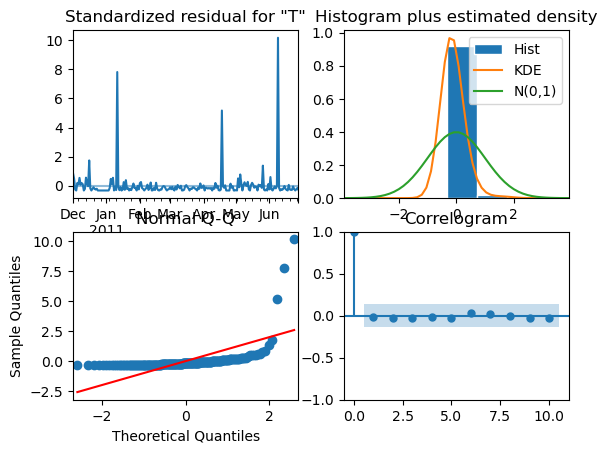

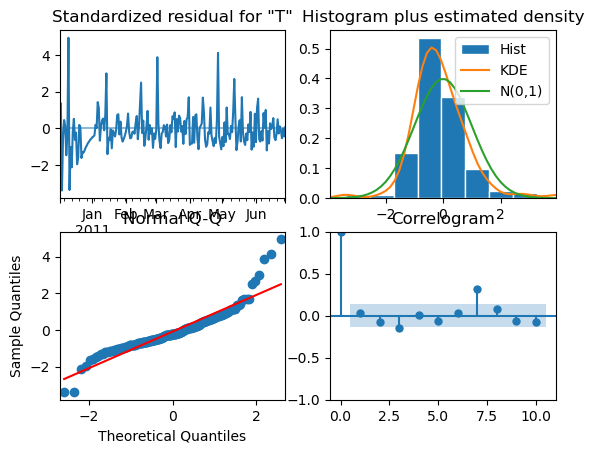

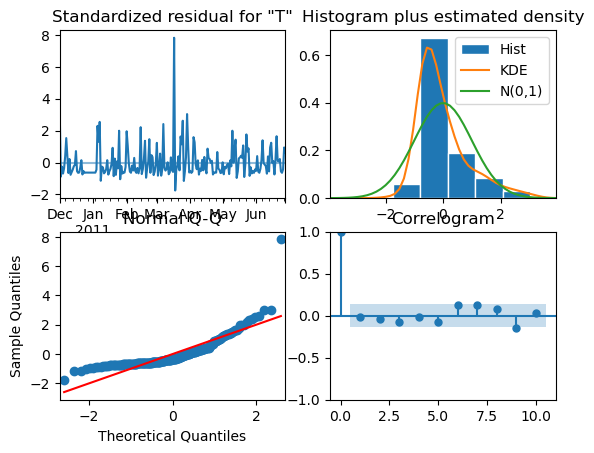

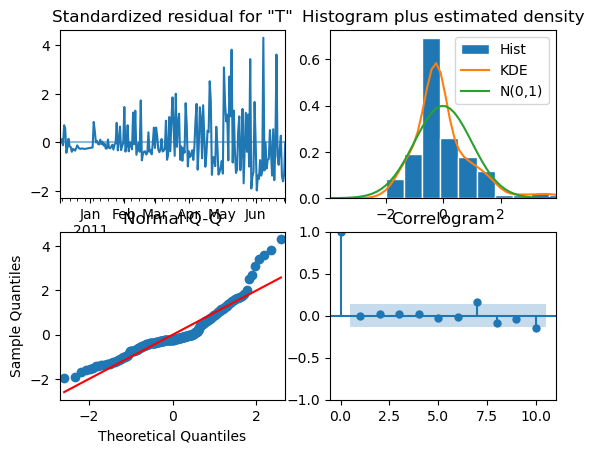

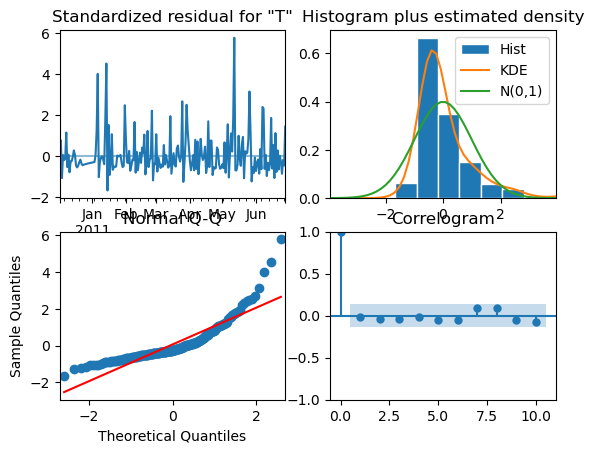

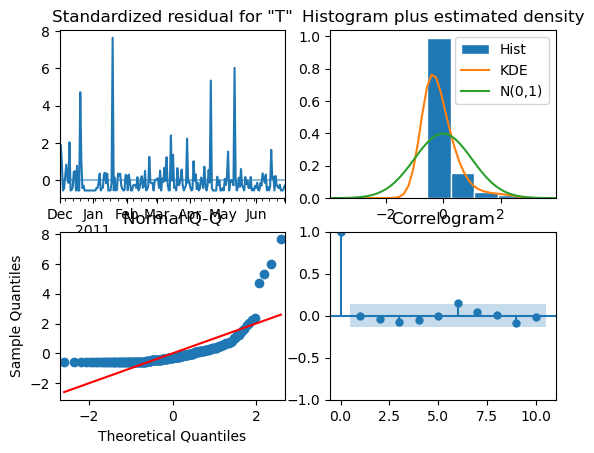

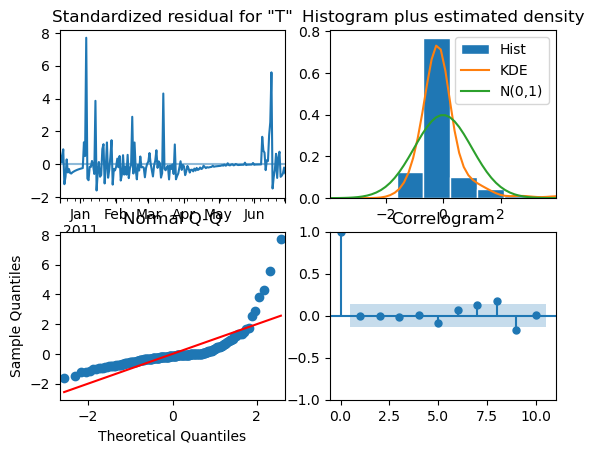

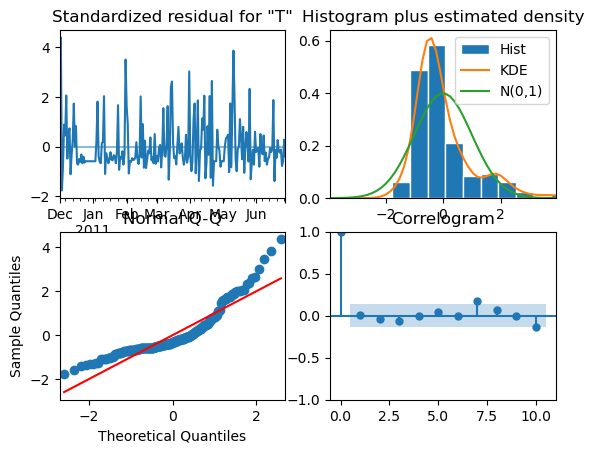

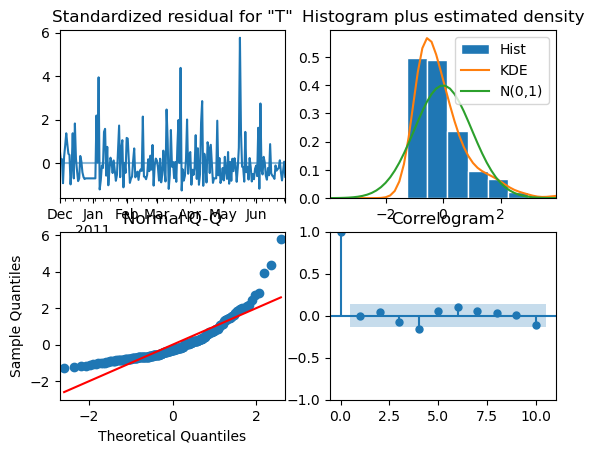

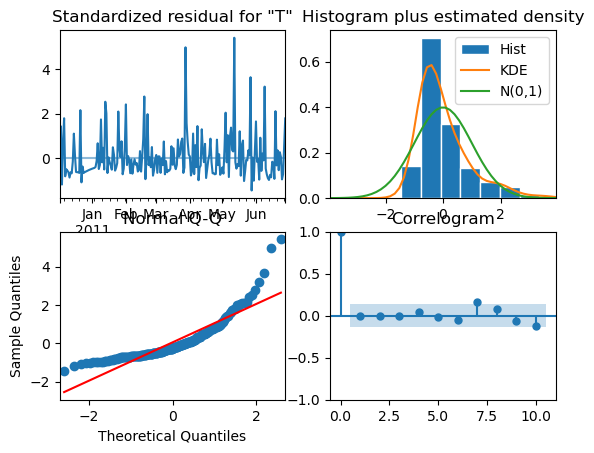

In [154]:
#print mean absolute error -- Product 1
mae1 = np.mean(np.abs(results1.resid))
print("Mean Absolute Error Product 1: ", mae1)

#create the 4 diagnostics plots
results1.plot_diagnostics().show()

#print mean absolute error -- Product 2
mae2 = np.mean(np.abs(results2.resid))
print("Mean Absolute Error Product 2: ", mae2)

#create the 4 diagnostics plots
results2.plot_diagnostics().show()

#print mean absolute error -- Product 3
mae3 = np.mean(np.abs(results3.resid))
print("Mean Absolute Error Product 3: ", mae3)

#create the 4 diagnostics plots
results3.plot_diagnostics().show()

#print mean absolute error -- Product 4
mae4 = np.mean(np.abs(results4.resid))
print("Mean Absolute Error Product 4: ", mae4)

#create the 4 diagnostics plots
results4.plot_diagnostics().show()

#print mean absolute error -- Product 5
mae5 = np.mean(np.abs(results5.resid))
print("Mean Absolute Error Product 5: ", mae5)

#create the 4 diagnostics plots
results5.plot_diagnostics().show()

#print mean absolute error -- Product 6
mae6 = np.mean(np.abs(results6.resid))
print("Mean Absolute Error Product 6: ", mae6)

#create the 4 diagnostics plots
results6.plot_diagnostics().show()

#print mean absolute error -- Product 7
mae7 = np.mean(np.abs(results7.resid))
print("Mean Absolute Error Product 7: ", mae7)

#create the 4 diagnostics plots
results7.plot_diagnostics().show()

#print mean absolute error -- Product 8
mae8 = np.mean(np.abs(results8.resid))
print("Mean Absolute Error Product 8: ", mae8)

#create the 4 diagnostics plots
results8.plot_diagnostics().show()

#print mean absolute error -- Product 9
mae9 = np.mean(np.abs(results9.resid))
print("Mean Absolute Error Product 9: ", mae9)

#create the 4 diagnostics plots
results9.plot_diagnostics().show()

#print mean absolute error -- Product 10
mae10 = np.mean(np.abs(results10.resid))
print("Mean Absolute Error Product 10: ", mae10)

#create the 4 diagnostics plots
results10.plot_diagnostics().show()

The ADF test was chosen because it is a standard statistical test for deciding whether a time series is stationary. Stationary data is needed to use the ARIMA time series modeling. Therefore, we must ensure our data is prepared before using ARIMA, or the model's prediction ability will be inaccurate. The disadvantage to using Adfuller is that it's sensitive to the size of your dataset (Jones 2024). Smaller datasets can provide unreliable results, leading to incorrect ARIMA model predictions.  

As for using pmdarima's auto_arima function, it is best for automating the selection of the ARIMA model's p, q, and d parameters without manually calculating each parameter individually. It automatically tries many different models and hyper-tunes them to find the best model that fits the data. This function is a time saver and requires less work for the user. However, the auto_arima function is expensive in terms of dataset size. The larger the dataset, the more time it takes the computer to search for the best ARIMA model (Investopedia 2024). For example, a few product datasets took longer to use auto_arima than others. This was not an issue for this project's timeline but could be for another business project with a much larger dataset. If more data is added to the original dataset (recommended below), it will take much longer for auto_arima to find the best model to use for forecasting.  

The mean absolute error was chosen for evaluating our forecast models because it uses the same units as the original data and provides an understandable forecast measure for non-technical people. A disadvantage to using this evaluation tool is that unlike Mean Squared Error (MSE), MAE does not rank significant errors versus small ones (Acharya 2023). Therefore, small and large errors affect the MAE, which is not always ideal for volatile data. 

In [223]:
#Perform forecast -- product 1
forecast1 = results1.get_forecast(steps=30)
mean_forecast1 = forecast1.predicted_mean
#Conf intervals of predictions
confidence_intervals1 = forecast1.conf_int()
#Upper & Lower conf limits
lower_limits1 = confidence_intervals1.loc[:,'lower TotalQuantity']
upper_limits1 = confidence_intervals1.loc[:,'upper TotalQuantity']

#Perform forecast -- product 2
forecast2 = results2.get_forecast(steps=30)
mean_forecast2 = forecast2.predicted_mean
#Conf intervals of predictions
confidence_intervals2 = forecast2.conf_int()
#Upper & Lower conf limits
lower_limits2 = confidence_intervals2.loc[:,'lower TotalQuantity']
upper_limits2 = confidence_intervals2.loc[:,'upper TotalQuantity']

#Perform forecast -- product 3
forecast3 = results3.get_forecast(steps=30)
mean_forecast3 = forecast3.predicted_mean
#Conf intervals of predictions
confidence_intervals3 = forecast3.conf_int()
#Upper & Lower conf limits
lower_limits3 = confidence_intervals3.loc[:,'lower TotalQuantity']
upper_limits3 = confidence_intervals3.loc[:,'upper TotalQuantity']

#Perform forecast -- product 4
forecast4 = results4.get_forecast(steps=30)
mean_forecast4 = forecast4.predicted_mean
#Conf intervals of predictions
confidence_intervals4 = forecast4.conf_int()
#Upper & Lower conf limits
lower_limits4 = confidence_intervals4.loc[:,'lower TotalQuantity']
upper_limits4 = confidence_intervals4.loc[:,'upper TotalQuantity']

#Perform forecast -- product 5
forecast5 = results5.get_forecast(steps=30)
mean_forecast5 = forecast5.predicted_mean
#Conf intervals of predictions
confidence_intervals5 = forecast5.conf_int()
#Upper & Lower conf limits
lower_limits5 = confidence_intervals5.loc[:,'lower TotalQuantity']
upper_limits5 = confidence_intervals5.loc[:,'upper TotalQuantity']

#Perform forecast -- product 6
forecast6 = results6.get_forecast(steps=30)
mean_forecast6 = forecast6.predicted_mean
#Conf intervals of predictions
confidence_intervals6 = forecast6.conf_int()
#Upper & Lower conf limits
lower_limits6 = confidence_intervals6.loc[:,'lower TotalQuantity']
upper_limits6 = confidence_intervals6.loc[:,'upper TotalQuantity']

#Perform forecast -- product 7
forecast7 = results7.get_forecast(steps=30)
mean_forecast7 = forecast7.predicted_mean
#Conf intervals of predictions
confidence_intervals7 = forecast7.conf_int()
#Upper & Lower conf limits
lower_limits7 = confidence_intervals7.loc[:,'lower TotalQuantity']
upper_limits7 = confidence_intervals7.loc[:,'upper TotalQuantity']

#Perform forecast -- product 8
forecast8 = results8.get_forecast(steps=30)
mean_forecast8 = forecast8.predicted_mean
#Conf intervals of predictions
confidence_intervals8 = forecast8.conf_int()
#Upper & Lower conf limits
lower_limits8 = confidence_intervals8.loc[:,'lower TotalQuantity']
upper_limits8 = confidence_intervals8.loc[:,'upper TotalQuantity']

#Perform forecast -- product 9
forecast9 = results9.get_forecast(steps=30)
mean_forecast9 = forecast9.predicted_mean
#Conf intervals of predictions
confidence_intervals9 = forecast9.conf_int()
#Upper & Lower conf limits
lower_limits9 = confidence_intervals9.loc[:,'lower TotalQuantity']
upper_limits9 = confidence_intervals9.loc[:,'upper TotalQuantity']

#Perform forecast -- product 10
forecast10 = results10.get_forecast(steps=30)
mean_forecast10 = forecast10.predicted_mean
#Conf intervals of predictions
confidence_intervals10 = forecast10.conf_int()
#Upper & Lower conf limits
lower_limits10 = confidence_intervals10.loc[:,'lower TotalQuantity']
upper_limits10 = confidence_intervals10.loc[:,'upper TotalQuantity']

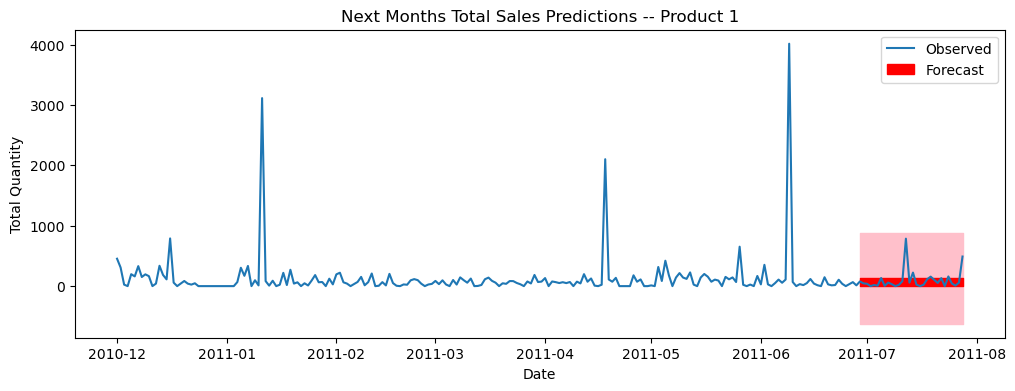

In [225]:
#Product 1 -- Plot Data
plt.figure(figsize=(12,4))
plt.plot(product_data_1.index, product_data_1.iloc[:, 1], label='Observed')
#shade upper CI
plt.fill_between(upper_limits1.index, upper_limits1, lower_limits1, color='pink')
#plot mean predictions
plt.fill_between(mean_forecast1.index, mean_forecast1, color='red', label='Forecast')

plt.title('Next Months Total Sales Predictions -- Product 1')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.show()

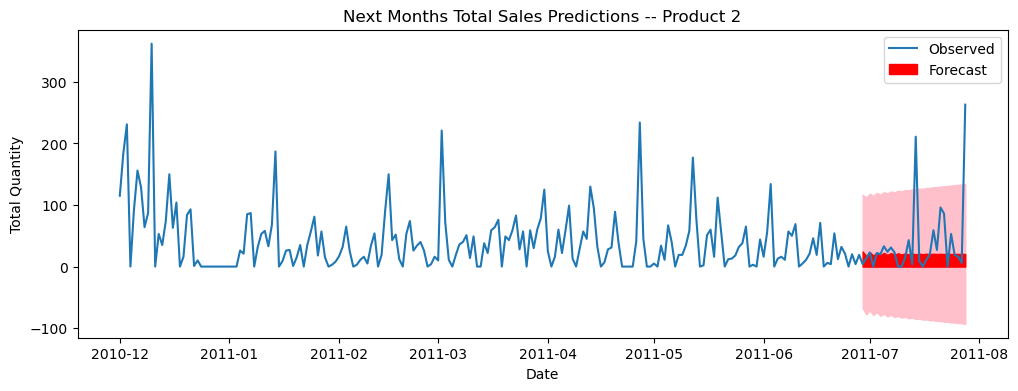

In [227]:
#Product 2 -- Plot Data
plt.figure(figsize=(12,4))
plt.plot(product_data_2.index, product_data_2.iloc[:, 1], label='Observed')
#shade upper CI
plt.fill_between(upper_limits2.index, upper_limits2, lower_limits2, color='pink')
#plot mean predictions
plt.fill_between(mean_forecast2.index, mean_forecast2, color='red', label='Forecast')

plt.title('Next Months Total Sales Predictions -- Product 2')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.show()

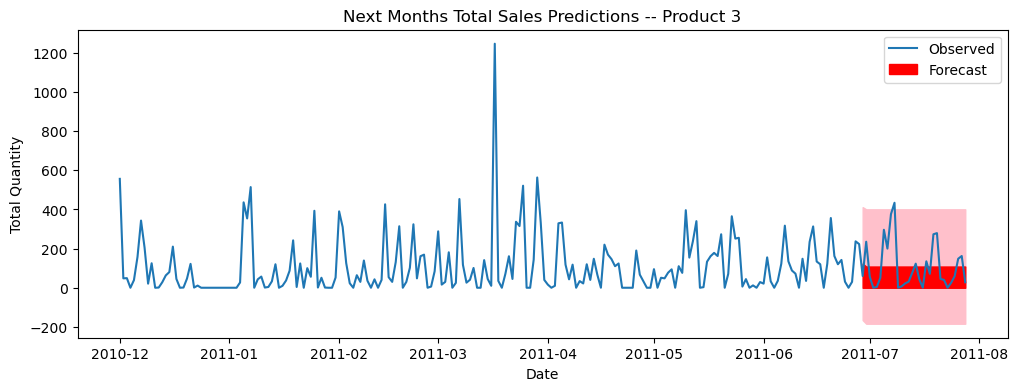

In [229]:
#Product 3 -- Plot Data
plt.figure(figsize=(12,4))
plt.plot(product_data_3.index, product_data_3.iloc[:, 1], label='Observed')
#shade upper CI
plt.fill_between(upper_limits3.index, upper_limits3, lower_limits3, color='pink')
#plot mean predictions
plt.fill_between(mean_forecast3.index, mean_forecast3, color='red', label='Forecast')

plt.title('Next Months Total Sales Predictions -- Product 3')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.show()

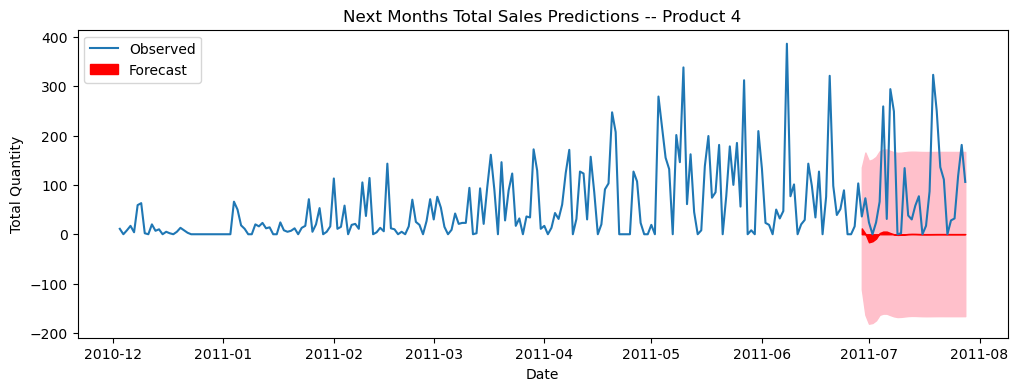

In [231]:
#Product 4 -- Plot Data
plt.figure(figsize=(12,4))
plt.plot(product_data_4.index, product_data_4.iloc[:, 1], label='Observed')
#shade upper CI
plt.fill_between(upper_limits4.index, upper_limits4, lower_limits4, color='pink')
#plot mean predictions
plt.fill_between(mean_forecast4.index, mean_forecast4, color='red', label='Forecast')

plt.title('Next Months Total Sales Predictions -- Product 4')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.show()

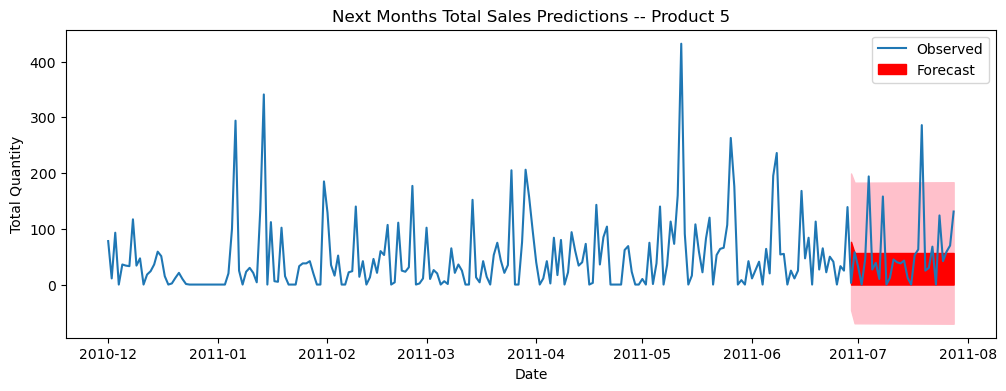

In [233]:
#Product 5 -- Plot Data
plt.figure(figsize=(12,4))
plt.plot(product_data_5.index, product_data_5.iloc[:, 1], label='Observed')
#shade upper CI
plt.fill_between(upper_limits5.index, upper_limits5, lower_limits5, color='pink')
#plot mean predictions
plt.fill_between(mean_forecast5.index, mean_forecast5, color='red', label='Forecast')

plt.title('Next Months Total Sales Predictions -- Product 5')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.show()

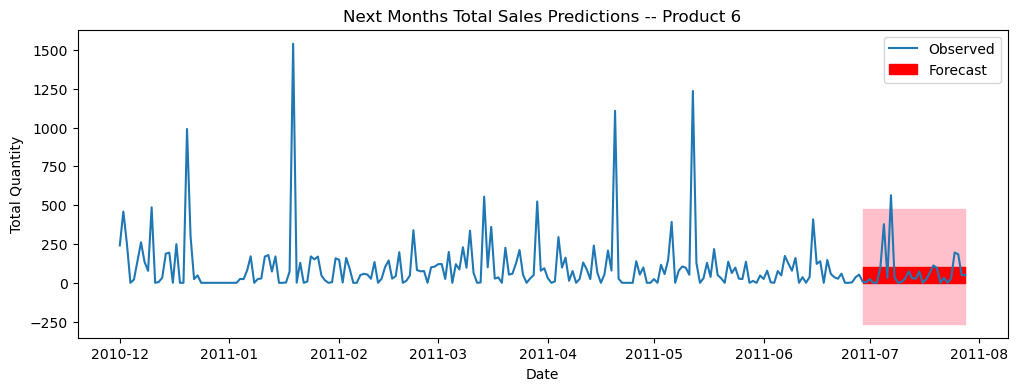

In [235]:
#Product 6 -- Plot Data
plt.figure(figsize=(12,4))
plt.plot(product_data_6.index, product_data_6.iloc[:, 1], label='Observed')
#shade upper CI
plt.fill_between(upper_limits6.index, upper_limits6, lower_limits6, color='pink')
#plot mean predictions
plt.fill_between(mean_forecast6.index, mean_forecast6, color='red', label='Forecast')

plt.title('Next Months Total Sales Predictions -- Product 6')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.show()

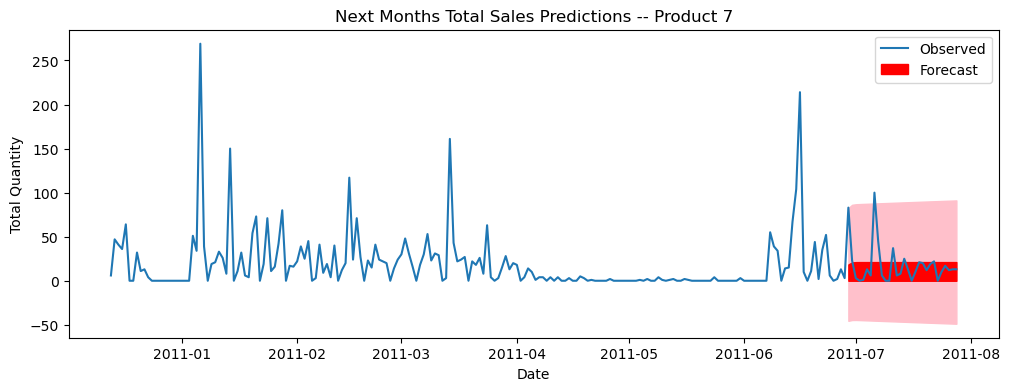

In [237]:
#Product 7 -- Plot Data
plt.figure(figsize=(12,4))
plt.plot(product_data_7.index, product_data_7.iloc[:, 1], label='Observed')
#shade upper CI
plt.fill_between(upper_limits7.index, upper_limits7, lower_limits7, color='pink')
#plot mean predictions
plt.fill_between(mean_forecast7.index, mean_forecast7, color='red', label='Forecast')

plt.title('Next Months Total Sales Predictions -- Product 7')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.show()

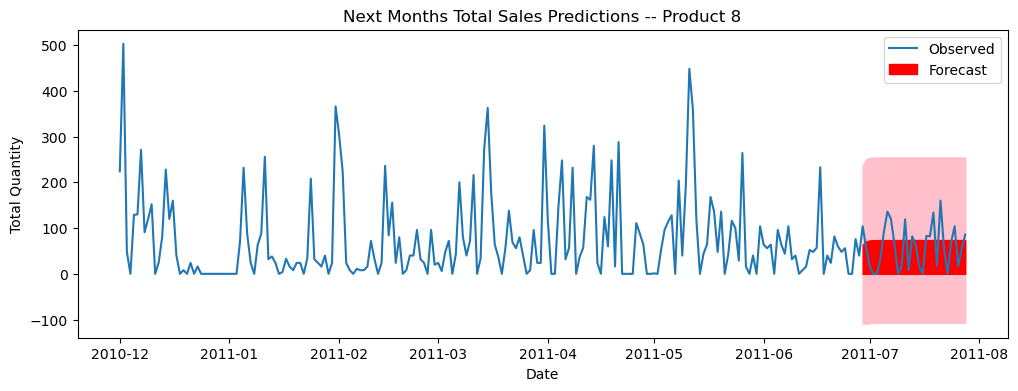

In [239]:
#Product 8 -- Plot Data
plt.figure(figsize=(12,4))
plt.plot(product_data_8.index, product_data_8.iloc[:, 1], label='Observed')
#shade upper CI
plt.fill_between(upper_limits8.index, upper_limits8, lower_limits8, color='pink')
#plot mean predictions
plt.fill_between(mean_forecast8.index, mean_forecast8, color='red', label='Forecast')

plt.title('Next Months Total Sales Predictions -- Product 8')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.show()

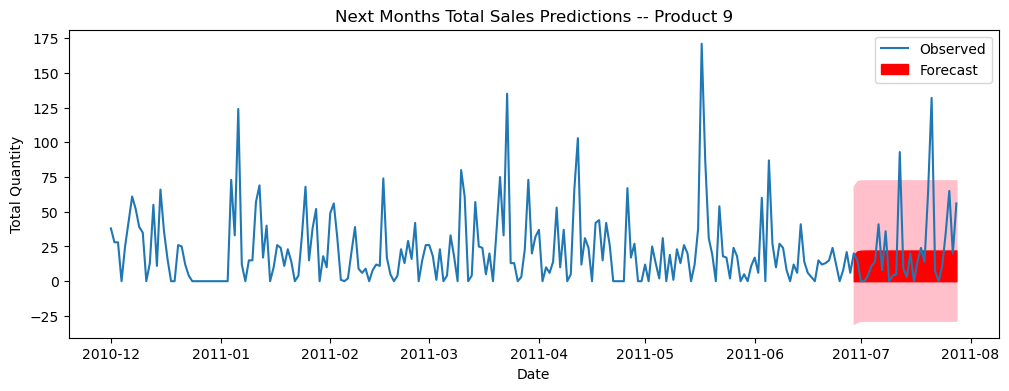

In [241]:
#Product 9 -- Plot Data
plt.figure(figsize=(12,4))
plt.plot(product_data_9.index, product_data_9.iloc[:, 1], label='Observed')
#shade upper CI
plt.fill_between(upper_limits9.index, upper_limits9, lower_limits9, color='pink')
#plot mean predictions
plt.fill_between(mean_forecast9.index, mean_forecast9, color='red', label='Forecast')

plt.title('Next Months Total Sales Predictions -- Product 9')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.show()

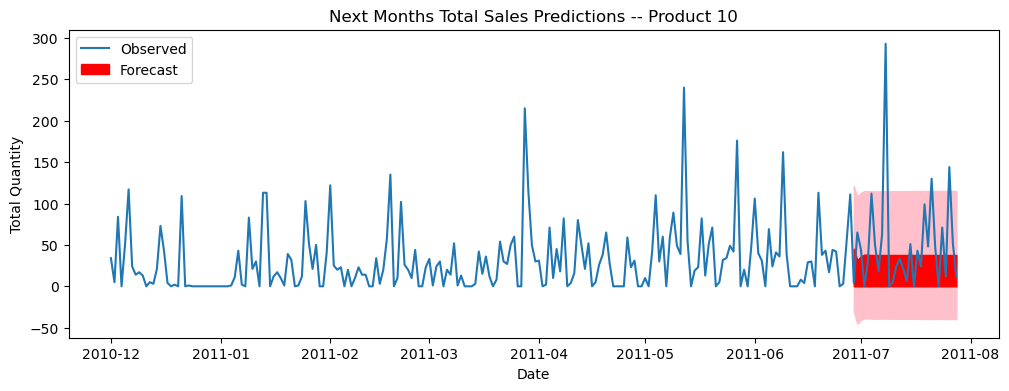

In [243]:
#Product 10 -- Plot Data
plt.figure(figsize=(12,4))
plt.plot(product_data_10.index, product_data_10.iloc[:, 1], label='Observed')
#shade upper CI
plt.fill_between(upper_limits10.index, upper_limits10, lower_limits10, color='pink')
#plot mean predictions
plt.fill_between(mean_forecast10.index, mean_forecast10, color='red', label='Forecast')

plt.title('Next Months Total Sales Predictions -- Product 10')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.show()

<Axes: title={'center': 'Product 10 Total Sales Projections for Next Month'}, xlabel='Date', ylabel='Total Quantity'>

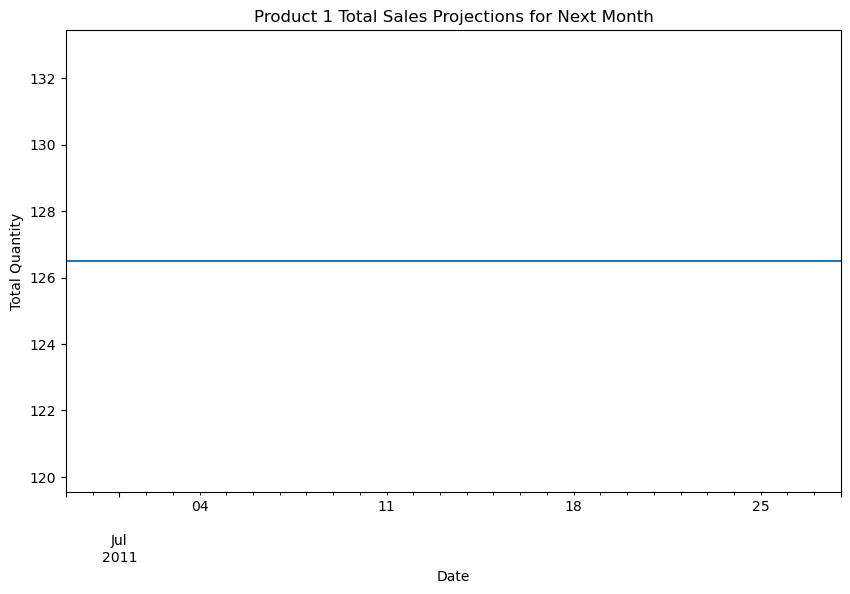

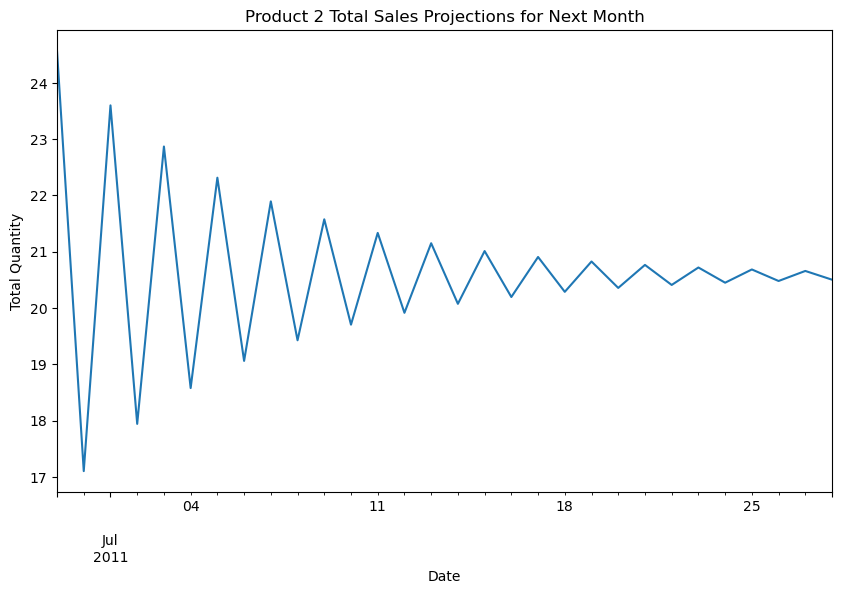

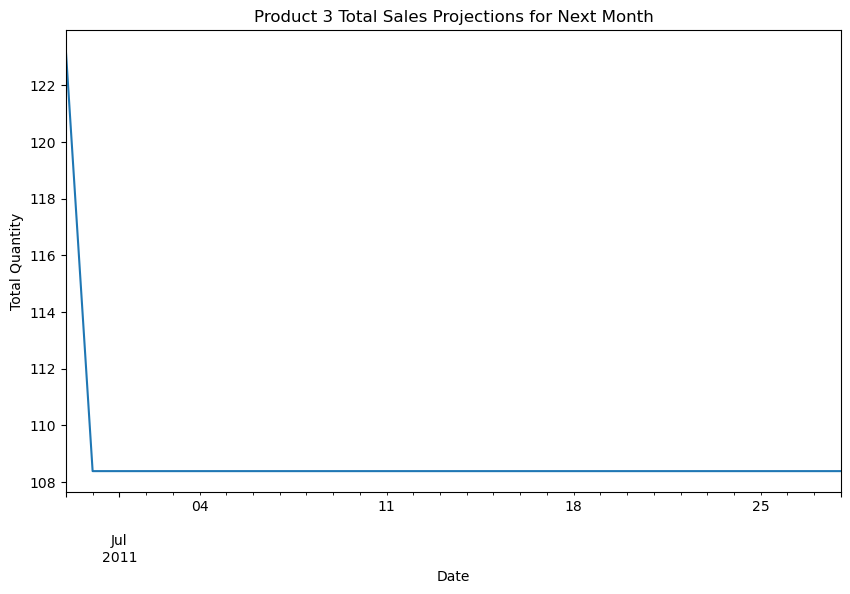

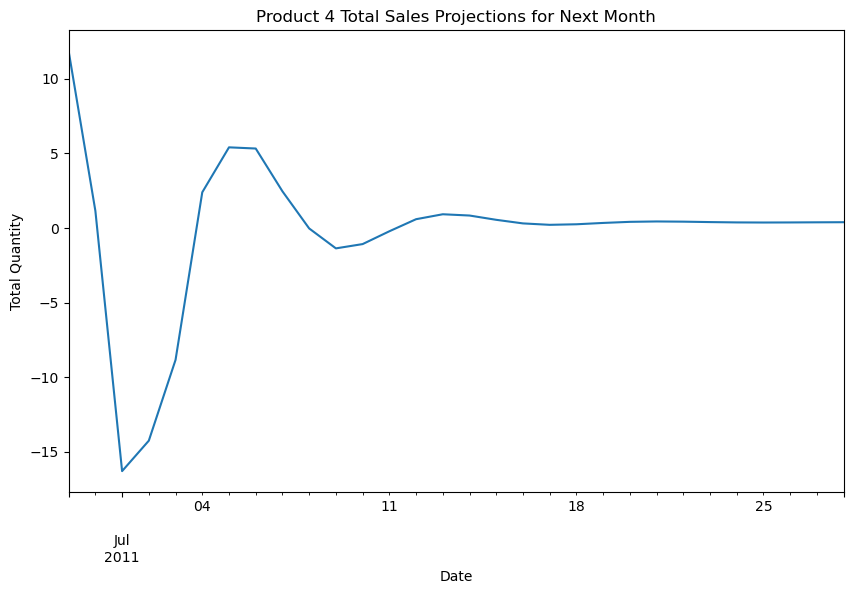

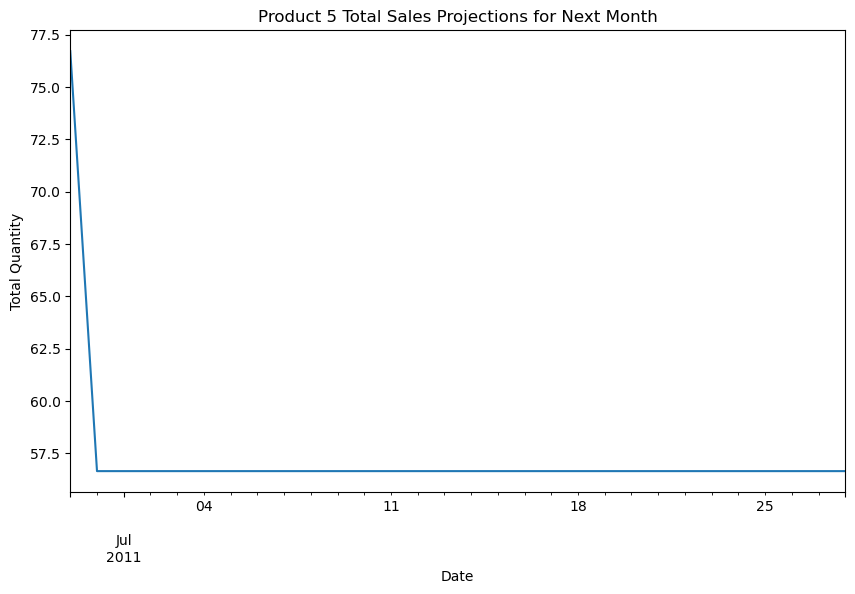

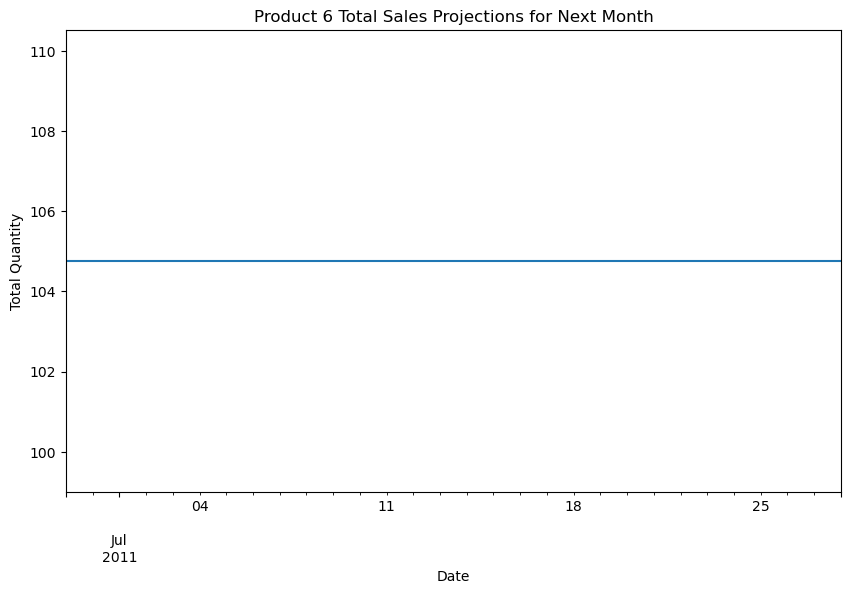

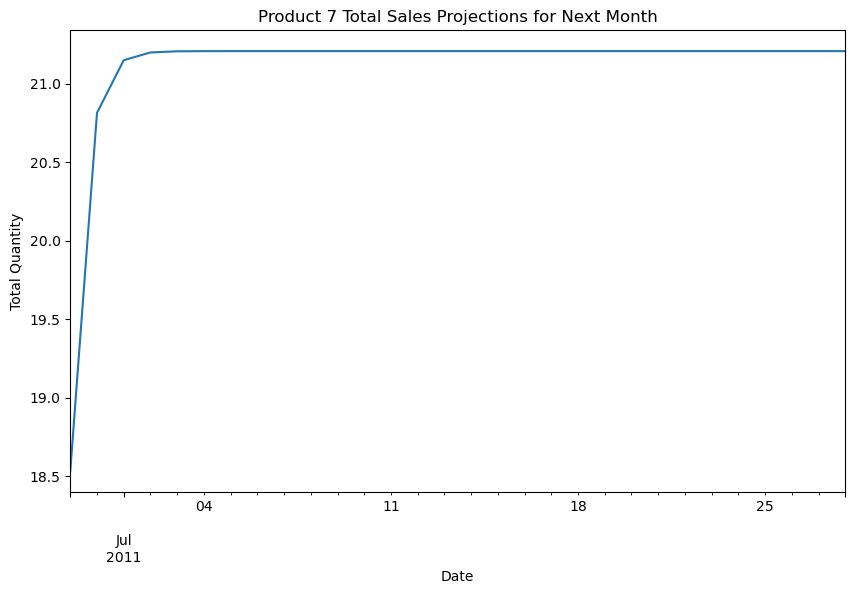

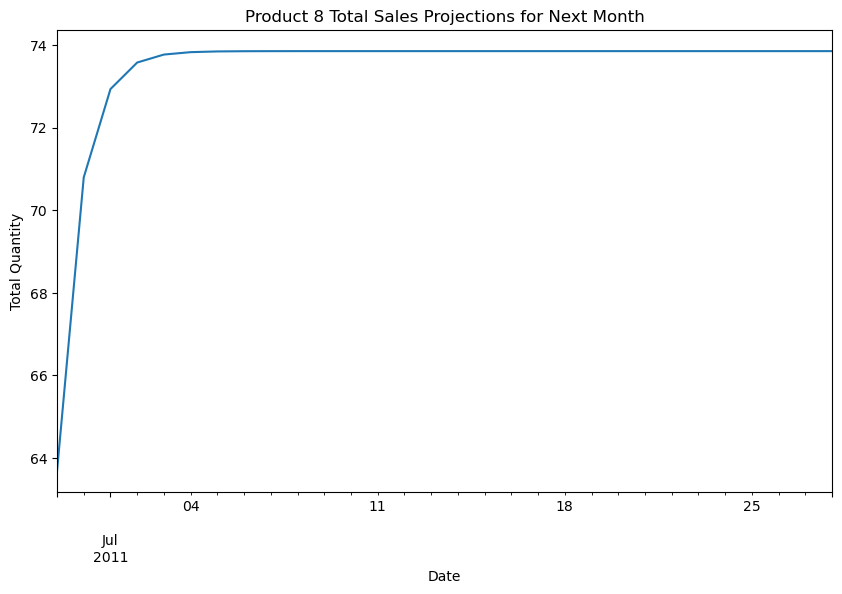

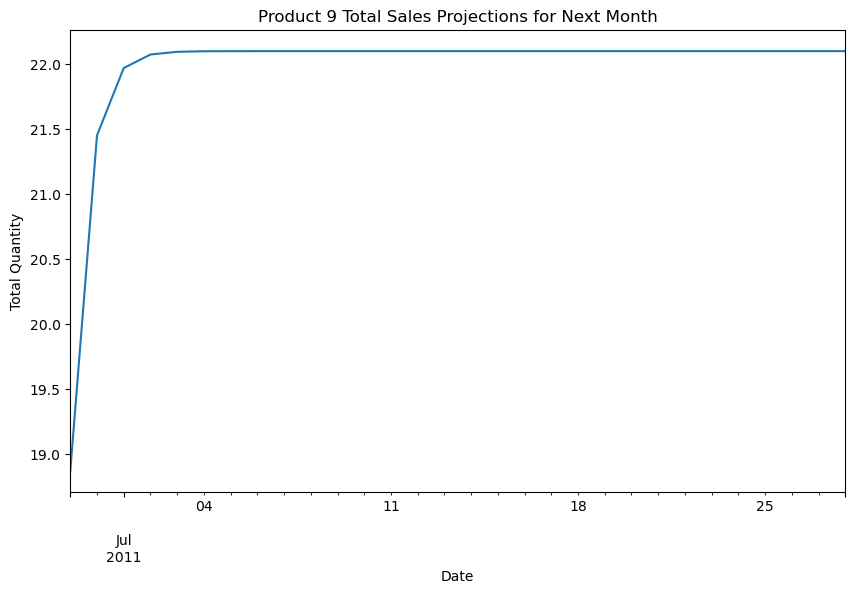

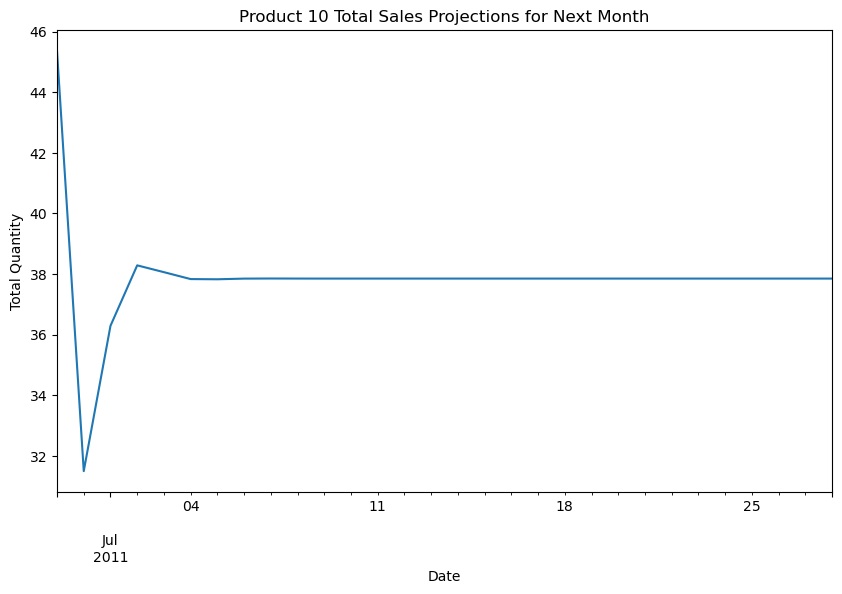

In [248]:
#plot for next month's product sales predictions
plt.figure(figsize=(10, 6))
plt.title('Product 1 Total Sales Projections for Next Month')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
mean_forecast1.plot()

plt.figure(figsize=(10, 6))
plt.title('Product 2 Total Sales Projections for Next Month')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
mean_forecast2.plot()

plt.figure(figsize=(10, 6))
plt.title('Product 3 Total Sales Projections for Next Month')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
mean_forecast3.plot()

plt.figure(figsize=(10, 6))
plt.title('Product 4 Total Sales Projections for Next Month')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
mean_forecast4.plot()

plt.figure(figsize=(10, 6))
plt.title('Product 5 Total Sales Projections for Next Month')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
mean_forecast5.plot()

plt.figure(figsize=(10, 6))
plt.title('Product 6 Total Sales Projections for Next Month')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
mean_forecast6.plot()

plt.figure(figsize=(10, 6))
plt.title('Product 7 Total Sales Projections for Next Month')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
mean_forecast7.plot()

plt.figure(figsize=(10, 6))
plt.title('Product 8 Total Sales Projections for Next Month')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
mean_forecast8.plot()

plt.figure(figsize=(10, 6))
plt.title('Product 9 Total Sales Projections for Next Month')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
mean_forecast9.plot()

plt.figure(figsize=(10, 6))
plt.title('Product 10 Total Sales Projections for Next Month')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
mean_forecast10.plot()

**E. Data Summary and Implications** 

Our focus for this project was forecasting next month's product demand for the top 10 products using historical sales data for a UK-based e-commerce store. The ARIMA time series model tool was selected due to its ability to capture the trends and seasonality of each top 10 product. The models were then evaluated using Mean Absolute Error to measure the effectiveness of the forecasts.  

The research question for this project aimed to determine the extent to which product demand can be predicted using time series analysis of historical sales data. The ARIMA models provided reasonable forecasts for all top 10 products that the business sold between December 2010 and December 2011. However, the accuracy of the models can be influenced by the lack of data provided (only one year). Even though there is a large number of historical transaction data, this data is from a single year. Typically, having more than one year of transactional data to forecast product demand would be beneficial.  

One limitation is the short time that the dataset contained. Time series models perform better with larger datasets with more than one year of data. Therefore, our results are not as reliable as a forecast based on multiple years of transactional data. Based on this information, we recommend collecting more transactional data to analyze with the ARIMA models.  

Two future study recommendations:  

1. Refine ARIMA models for products 1, 3, and 6 as they were the lowest performing models in terms of AIC value. This might allow us to use the models to help predict product demand once we add more data to our store's transaction history.  

2. Additional Data: Future studies on this topic must contain more than three years of transactional data. This will increase the accuracy and reliability of the models' forecast results. The business would greatly benefit from more accurate product demand forecasts based on at least three years of transactional data versus one year of data.   

**F. Sources**

DataCamp. (2024, December 29). ARIMA for time series forecasting: A complete guide. DataCamp. Retrieved February 8, 2025, from https://www.datacamp.com/tutorial/arima  

Hyndman, R. J., & Athanasopoulos, G. (2021). Forecasting: Principles and Practice (3rd ed.). OTexts. https://otexts.com/fpp3/  

International Trade Administration. (n.d.). Impact of COVID pandemic on eCommerce. U.S. Department of Commerce. Retrieved February 8, 2025, from https://www.trade.gov/impact-covid-pandemic-ecommerce 

Joy, A. (2025). 5 main disadvantages of Python programming language. Pythonista Planet. Retrieved February 9, 2025, from https://pythonistaplanet.com/disadvantages-of-python/